# Heart Disease Prediction | COGS 118B - Final Project

## Group members
Denny Yoo, Jeffrey Yang, Yash Pakti, Samantha Prestrelski, Fayaz Shaik

## Abstract

According to the Centers for Disease Control and Prevention (CDC), heart disease is the leading cause of death in the United States <a name="cite_ref-5"></a>[<sup>5</sup>](#cite_note-5). Although we know some of the causes of heart disease, there is no concrete formula for determining whether a person has heart disease. However, based on commonalities in people's health, we hope to use machine learning to predict which people may be at higher risk for heart disease. Early identification can help inform lifestyle choices and decrease this risk.

Our dataset comes from annual telephone surveys conducted by the CDC as part of the Behavioral Risk Factor Surveillance System (BRFSS), where each row represents a different person and each column is a health factor that might play a part an individual having heart disease. We used K-means, Gaussian Mixture Models, and hierarchical clustering which achieved maximum silhouette scores of 0.32, 0.29, and 0.63 respectively after principal component analysis for dimensionality reduction. Our hierarchical clustering method performed the best in producing the most cohesive clusters.

## Background

Heart disease affects millions of people each year and is a leading cause of mortality worldwide. The early prediction and diagnosis of heart disease is crucial for early intervention, improved treatment, and better patient outcomes. It is thus critical that medical practitioners have access to tools that would grant them the ability to make such early detections of heart disease in patients, a challenge that our project seeks to address.

As our model utilizes various health factors in its prediction of heart disease, it is crucial to understand how these factors influence the probability of an individual having heart disease. Extensive prior research exists which meticulously analyzes how factors such as BMI and age contribute to the likelihood of heart disease, illuminating the complex relationships that our model seeks to capture. A 2021 study by the American Heart Association found that obesity, as quantified by BMI, is directly responsible for a range of cardiovascular risk factors such as diabetes and hypertension which heavily contribute to an increased likelihood of heart disease <a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1). A WebMD article corroborates that individuals past the age of 65 are drastically more susceptible to heart failure and other conditions that are linked to heart disease <a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2). Due to their high impact nature, it is clearly imperative that BMI and age, along with the other 15 health factors, be integrated into our model should we want to comprehensively predict heart disease in patients.

Past research has also shown machine learning models to be excellent predictors of medical conditions like heart disease. A 2023 study found various neural network models to be capable of achieving up to 94.78% accuracy in heart disease prediction <a name="cite_ref-3"></a>[<sup>3</sup>](#cite_note-3). Due to the past success of these models, it becomes increasingly clear that machine learning algorithms are best fitted towards solving our problem of predicting heart disease. 


# Problem Statement

> Given our dataset with various factors relating to a patient, can we build a ML model that can accurately predict a person's chance of getting heart disease?

According to the CDC, about half of all Americans (47%) have at least 1 of 3 key risk factors for heart disease: high blood pressure, high cholesterol, and smoking <a name="cite_ref-4"></a>[<sup>4</sup>](#cite_note-4). Thus, our problem affects a huge population. Fortunately, heart disease is treatable and chances of it being treated are far better if prevented early on.

Our dataset features a variety of patients' information including their BMI, gender, and medical history, which we believe can be used to generate patterns in the form of quantitative metrics such as "there are X patients who have heart disease" and "X% of patients who are between the ages of 50-60 have heart disease." This information about lifestyle can be used as variables in our machine learning model.

The problem is quantifiable as it expresses the risk of heart disease as a percentage or a singular yes/no to express whether that person should be worried about heart disease if they continue their current lifestyle. We can also quantify the similarity of one person who hasn't had heart disease yet to others with similar traits that *do* have heart disease.

This model's performance can be measured by how accurately it tracks a person's actual risk of heart disease. We will take a random sample of the dataset since running it over the full dataset is too computationally expensive. However, we can verify the performance of our model by taking another sample, removing overlapping data, and running the model again.  

Finally, this problem is replicable as our dataset and other ML training methods are publicly available. That way, others can use reproduce our methods both with our dataset and others to verify our results. Our models can also be retrained later with updated data.

We will discuss the ML models further in the Proposed Solution section, but we will use different unsupervised clustering methods including hierarchical clustering, K-means, and Gaussian Mixture Models to attempt to find patterns in the data.

## Data

To investigate this question, we searched for a dataset that included information about which individuals had heart disease and traits that could possibly cause it. Our dataset, available on [Kaggle](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease) was sourced from a 2022 annual CDC survey of over 400,000 adults on their health status. We will use 37 of the variables provided to predict heart disease, including the following:
> SleepHours, RemovedTeeth, HadHeartAttack, HadAngina, HadStroke, HadAsthma, HadSkinCancer, HadCOPD, HadDepressiveDisorder, HadKidneyDisease, HadArthritis, HadDiabetes, DeafOrHardOfHearing, BlindOrVisionDifficulty,DifficultyConcentrating, DifficultyWalking,DifficultyDressingBathing, DifficultyErrands, SmokerStatus,ECigaretteUsage, ChestScan, RaceEthnicityCategory, AgeCategory, HeightInMeters, WeightInKilograms, BMI, AlcoholDrinkers, HIVTesting, FluVaxLast12, PneumoVaxEver, TetanusLast10Tdap,HighRiskLastYear, CovidPos

Our dataset contains 320,000 observations, where each observation is a U.S. resident that provided their health status as part of the Behavioral Risk Factor Surveillance System (BRFSS)'s telephone surveys.

According to the [CDC](https://www.cdc.gov/heartdisease/risk_factors.htm) <a name="cite_ref-4"></a>[<sup>4</sup>](#cite_note-4), 
> About half of all Americans (47%) have at least 1 of 3 key risk factors for heart disease: high blood pressure, high cholesterol, and smoking.

Although high blood pressure and high cholesterol are hard to measure, diabetes and obesity are indicators of high blood pressure, making `BMI`, `Diabetic`, and `PhysicalActivity` critical variables, as well as `SmokerStatus`. BMI is numerical, Diabetic is Yes/No/Other, PhysicalActivity is Yes/No, and SmokerStatus has a few categories. The categorical variables and their answers corresponded to the [following questions](https://github.com/kamilpytlak/data-science-projects/blob/main/heart-disease-prediction/2022/documentation/vars_list_with_descriptions.tx)
> DIABETE4 - (Ever told) (you had) diabetes?  
> EXERANY2 - During the past month, other than your regular job, did you participate in any physical activities or exercises such as running, calisthenics, golf, gardening, or walking for exercise?  
> SMOKER3 - Four-level smoker status:  Everyday smoker, Someday smoker, Former smoker, Non-smoker

From data exploration in the Models notebook, we know that the original dataset provided had no null values. We have upwards of 200k different values and 40 different columns to work with, and identified different unique values for columns with data containing words, strings, and categories. We also identified the distributions of the data containing numerical values. 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder

path_to_data = "data/heart_2022_no_nans.csv"
heart_2022 = pd.read_csv(path_to_data)
heart_2022.head()

State     Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0  Alabama  Female     Very good                 4.0               0.0   
1  Alabama    Male     Very good                 0.0               0.0   
2  Alabama    Male     Very good                 0.0               0.0   
3  Alabama  Female          Fair                 5.0               0.0   
4  Alabama  Female          Good                 3.0              15.0   

                                     LastCheckupTime PhysicalActivities  \
0  Within past year (anytime less than 12 months ...                Yes   
1  Within past year (anytime less than 12 months ...                Yes   
2  Within past year (anytime less than 12 months ...                 No   
3  Within past year (anytime less than 12 months ...                Yes   
4  Within past year (anytime less than 12 months ...                Yes   

   SleepHours            RemovedTeeth HadHeartAttack  ... HeightInMeters  \
0         9.0            None of them             No  ...           1.60   
1         6.0            None of them             No  ...           1.78   
2         8.0  6 or more, but not all             No  ...           1.85   
3         9.0            None of them             No  ...           1.70   
4         5.0                  1 to 5             No  ...           1.55   

  WeightInKilograms    BMI AlcoholDrinkers HIVTesting FluVaxLast12  \
0             71.67  27.99              No         No          Yes   
1             95.25  30.13              No         No          Yes   
2            108.86  31.66             Yes         No           No   
3             90.72  31.32              No         No          Yes   
4             79.38  33.07              No         No          Yes   

  PneumoVaxEver                                  TetanusLast10Tdap  \
0           Yes                                 Yes, received Tdap   
1           Yes  Yes, received tetanus shot but not sure what type   
2           Yes  No, did not receive any tetanus shot in the pa...   
3           Yes  No, did not receive any tetanus shot in the pa...   
4           Yes  No, did not receive any tetanus shot in the pa...   

  HighRiskLastYear CovidPos  
0               No       No  
1               No       No  
2               No      Yes  
3               No      Yes  
4               No       No  

[5 rows x 40 columns]

We will scale float-based columns to between 0 and 1 to normalize them. We will also one-hot encode the categorical columns, sufficiently vectorizing the data and allowing us to do classification and analysis to predict what factors affect heart disease in patients. 

In [11]:
# scale float-based columns to between 0 and 1
numerical_cols = heart_2022.select_dtypes(include=['float']).columns
print(f'Numerical Columns: {list(numerical_cols)}')
for col in numerical_cols:
    heart_2022[col] = heart_2022[col]/heart_2022[col].max()

# one-hot encode categorical columns
category_cols = heart_2022.select_dtypes(include=['O']).columns
print(f'Categorical Columns {list(category_cols)}')
# for binary columns
binary_cols = [col for col in category_cols if heart_2022[col].nunique() == 2]
for col in binary_cols:
    le = LabelEncoder()
    heart_2022[col] = le.fit_transform(heart_2022[col])

# for columns with more than two unique values
multiple_cols = [col for col in category_cols if heart_2022[col].nunique() != 2]
df = pd.get_dummies(heart_2022, columns=multiple_cols, prefix=multiple_cols)
df.to_csv("heart_2022_cleaned.csv")

df_noindic = df.drop(columns=["HadHeartAttack", "HadAngina", "HadStroke"])
df_noindic.head()

Sex  PhysicalHealthDays  MentalHealthDays  PhysicalActivities  SleepHours  \
0    0            0.133333               0.0                   1    0.375000   
1    1            0.000000               0.0                   1    0.250000   
2    1            0.000000               0.0                   0    0.333333   
3    0            0.166667               0.0                   1    0.375000   
4    0            0.100000               0.5                   1    0.208333   

   HadAsthma  HadSkinCancer  HadCOPD  HadDepressiveDisorder  HadKidneyDisease  \
0          0              0        0                      0                 0   
1          0              0        0                      0                 0   
2          0              0        0                      0                 0   
3          0              1        0                      1                 0   
4          0              0        0                      0                 0   

   ...  AgeCategory_Age 70 to 74  AgeCategory_Age 75 to 79  \
0  ...                     False                     False   
1  ...                      True                     False   
2  ...                     False                      True   
3  ...                     False                     False   
4  ...                     False                     False   

   AgeCategory_Age 80 or older  \
0                        False   
1                        False   
2                        False   
3                         True   
4                         True   

   TetanusLast10Tdap_No, did not receive any tetanus shot in the past 10 years  \
0                                              False                             
1                                              False                             
2                                               True                             
3                                               True                             
4                                               True                             

   TetanusLast10Tdap_Yes, received Tdap  \
0                                  True   
1                                 False   
2                                 False   
3                                 False   
4                                 False   

   TetanusLast10Tdap_Yes, received tetanus shot but not sure what type  \
0                                              False                     
1                                               True                     
2                                              False                     
3                                              False                     
4                                              False                     

   TetanusLast10Tdap_Yes, received tetanus shot, but not Tdap  CovidPos_No  \
0                                              False                  True   
1                                              False                  True   
2                                              False                 False   
3                                              False                 False   
4                                              False                  True   

   CovidPos_Tested positive using home test without a health professional  \
0                                              False                        
1                                              False                        
2                                              False                        
3                                              False                        
4                                              False                        

   CovidPos_Yes  
0         False  
1         False  
2          True  
3          True  
4         False  

[5 rows x 130 columns]

# Proposed Solution

In this section, clearly describe a solution to the problem. The solution should be applicable to the project domain and appropriate for the dataset(s) or input(s) given. Provide enough detail (e.g., algorithmic description and/or theoretical properties) to convince us that your solution is applicable. Make sure to describe how the solution will be tested.  

If you know details already, describe how (e.g., library used, function calls) you plan to implement the solution in a way that is reproducible.

If it is appropriate to the problem statement, describe a benchmark model<a name="sota"></a>[<sup>[3]</sup>](#sotanote) against which your solution will be compared. 

# Proposed Solution

We will compare the performance of different techniques of unsupervised learning methods learned in class. This includes methods such as K-means, Gaussian Mixture Models, Hierarchical clustering, and spectral clustering. Since there are 17 predicting variables for a binary value, we'll likely have to do some sort of dimensionality reduction such as Principal Component Analysis to make the model more manageable.  

Although traits like high blood pressure, high cholesterol, and smoking are known to be risk factors for heart disease, we are unsure of their predictive value compared to other traits in the dataset, since there is no simple equation for heart disease. Thus, unsupervised learning methods can help us see if there's any trends in the data of people with similar traits.  

We will split our data into a training, validation, and test set to evaluate the performance of our models. Each model will be trained on the training set, then evaluated on the validation set for initial results. Once we've tuned the hyperparameters for each of the individual models, we will do a final evaluation against the test set. We will compare our methods to a baseline [logistic regression model](https://share.streamlit.io/kamilpytlak/heart-condition-checker/main/app.py) developed by the creator of the dataset.  

We will do all work in Jupyter notebooks using publicly available models and datasets, as well as provide links to any resources used so that our work is reproducible. 

## Evaluation Metrics

We will use silhouette score to evaluate our models. Silhouette score takes into account the distances between the points of one cluster and the nearest cluster center. The function for silhouette score can be generalized as such:

$$
\frac{separation - cohesion}{max(separation, cohesion)}
$$

This metric can be used to determine the optimal number of clusters for our data as certain factors could lead to specific kinds of heart disease, or we can see if there is great overlap between them with a smaller number of clusters. This metric works across all of our unsupervised clustering methods and allows us to directly compare the performance of multiple models, rather than having to interpret multiple metrics.

# Results

You may have done tons of work on this. Not all of it belongs here. 

Reports should have a __narrative__. Once you've looked through all your results over the quarter, decide on one main point and 2-4 secondary points you want us to understand. Include the detailed code and analysis results of those points only; you should spend more time/code/plots on your main point than the others.

If you went down any blind alleys that you later decided to not pursue, please don't abuse the TAs time by throwing in 81 lines of code and 4 plots related to something you actually abandoned.  Consider deleting things that are not important to your narrative.  If its slightly relevant to the narrative or you just want us to know you tried something, you could keep it in by summarizing the result in this report in a sentence or two, moving the actual analysis to another file in your repo, and providing us a link to that file.

### Subsection 1

You will likely have different subsections as you go through your report. For instance you might start with an analysis of the dataset/problem and from there you might be able to draw out the kinds of algorithms that are / aren't appropriate to tackle the solution.  Or something else completely if this isn't the way your project works.

### Subsection 2

Another likely section is if you are doing any feature selection through cross-validation or hand-design/validation of features/transformations of the data

### Subsection 3

Probably you need to describe the base model and demonstrate its performance.  Maybe you include a learning curve to show whether you have enough data to do train/validate/test split or have to go to k-folds or LOOCV or ???

### Subsection 4

Perhaps some exploration of the model selection (hyper-parameters) or algorithm selection task. Validation curves, plots showing the variability of perfromance across folds of the cross-validation, etc. If you're doing one, the outcome of the null hypothesis test or parsimony principle check to show how you are selecting the best model.

### Subsection 5 

Maybe you do model selection again, but using a different kind of metric than before?



# Discussion

### Interpreting the result

OK, you've given us quite a bit of tech information above, now its time to tell us what to pay attention to in all that.  Think clearly about your results, decide on one main point and 2-4 secondary points you want us to understand. Highlight HOW your results support those points.  You probably want 2-5 sentences per point.

### Limitations

Are there any problems with the work?  For instance would more data change the nature of the problem? Would it be good to explore more hyperparams than you had time for?   

### Ethics & Privacy

Using the provided data science ethics checklist from https://deon.drivendata.org, we discuss the following potential concerns with ethics and data privacy:
Data Collection
- **Informed Consent**: The human subjects opted in, as they could have refused the telemarketing survey, hung up the phone at any time, or refused to answer questions. 
- **Collection Bias/Bias Mitigation**: Some bias is towards people that are willing to give their information, which might be affected by age or location. It also restricts the survey to those that have access to phone services. This dataset might also be affected by access to healthcare: certain diagnoses like diabetes, heart disease, and kidney disease might be missed for lower-income people that don't have the resources to get diagnosed. While we cannot fix the collection process, we will need to do exploratory data analysis to see what demographics are represented and if there are any specific groups are over- or underrepresented. 
- **Limit PII exposure**: Health information is inherently personally identifiable. However, the dataset has been cleaned to only include Sex, Age, and Race as the most PII. We can do research into whether these factors are very important in predicting heart disease, or if there's negligible difference. If there are not significant differences, we can anonymize this dataset further. 

Data Storage
- **Data retention plan**: This dataset is public and managed by someone else. However, in the testing phase, we should not store any results of people who test our model if they input their own information. 

Deployment
- **Monitoring and Evaluation**: If this ML project were to go into production, we would not collect user data. Any computations would be done on the client side, meaning we have no access to any of the user inputs and thus cannot store them.
- **Redress**: To prevent unintentional user harm, we would also put a warning that this model is not a recommendation from medical professionals and is purely based on data. If this were to be in production for a while, we could update our model based on yearly new releases from the CDC's BRFSS. We can also provide a feedback form for any user complaints. 

As we continue to work with the data and develop our model/metrics, we will revisit the data ethics checklist to ensure we address potential ethical concerns.


### Conclusion

Reiterate your main point and in just a few sentences tell us how your results support it. Mention how this work would fit in the background/context of other work in this field if you can. Suggest directions for future work if you want to.

## Hierarchical Clustering

In [34]:
from scipy.cluster.hierarchy import fcluster
from numpy.linalg import norm
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score

import seaborn as sns

# setup plotting in a notebook in a reasonable way
%matplotlib inline
%config InlineBackend.figure_format='retina'

# default figure aesthetics I'll be using, 
# there are other choices, see seaborn docs
sns.set_style("white")
sns.set_context("notebook")

In [29]:
# We take a random sample of size 5000 of our data
sampled_heart_2022 = df_noindic.sample(n=1000, random_state = 42)
sampled_heart_2022

Sex  PhysicalHealthDays  MentalHealthDays  PhysicalActivities  \
194767    0            0.000000          0.000000                   1   
231923    0            0.066667          0.166667                   1   
52815     1            0.233333          0.333333                   1   
65909     0            0.666667          0.333333                   0   
184154    0            0.000000          0.000000                   1   
...     ...                 ...               ...                 ...   
225991    0            0.000000          1.000000                   1   
17905     0            1.000000          0.166667                   0   
68078     0            0.100000          0.000000                   1   
39514     0            0.000000          0.333333                   1   
161690    1            0.000000          0.000000                   0   

        SleepHours  HadAsthma  HadSkinCancer  HadCOPD  HadDepressiveDisorder  \
194767    0.333333          0              0        0                      0   
231923    0.333333          1              0        0                      0   
52815     0.250000          1              0        0                      0   
65909     0.333333          0              0        1                      1   
184154    0.291667          0              0        0                      0   
...            ...        ...            ...      ...                    ...   
225991    0.375000          1              0        0                      0   
17905     0.166667          1              1        0                      1   
68078     0.291667          0              0        0                      0   
39514     0.416667          1              0        0                      0   
161690    0.250000          0              0        0                      0   

        HadKidneyDisease  ...  AgeCategory_Age 70 to 74  \
194767                 0  ...                     False   
231923                 0  ...                     False   
52815                  0  ...                     False   
65909                  1  ...                     False   
184154                 0  ...                     False   
...                  ...  ...                       ...   
225991                 0  ...                     False   
17905                  0  ...                     False   
68078                  0  ...                      True   
39514                  0  ...                      True   
161690                 0  ...                     False   

        AgeCategory_Age 75 to 79  AgeCategory_Age 80 or older  \
194767                     False                        False   
231923                     False                        False   
52815                      False                        False   
65909                      False                        False   
184154                     False                        False   
...                          ...                          ...   
225991                     False                        False   
17905                      False                        False   
68078                      False                        False   
39514                      False                        False   
161690                     False                        False   

        TetanusLast10Tdap_No, did not receive any tetanus shot in the past 10 years  \
194767                                               True                             
231923                                               True                             
52815                                               False                             
65909                                                True                             
184154                                              False                             
...                                                   ...                             
225991                                              False              

Due to the size of our dataset, we've selected a sample of 1000 data points. We believe that this sample size is large enough for us to get a representative view of the dataset while also compromising for our ability to run the models. 

In [30]:
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(sampled_heart_2022) 
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df)
normalized_df.columns = df_noindic.columns
normalized_df

Sex  PhysicalHealthDays  MentalHealthDays  PhysicalActivities  \
0   -0.083719           -0.046465         -0.049926            0.048645   
1   -0.098300           -0.029668          0.008359            0.057117   
2    0.086232            0.022622          0.052351            0.039688   
3   -0.069461            0.137323          0.053237           -0.150920   
4   -0.074060           -0.041104         -0.044166            0.043032   
..        ...                 ...               ...                 ...   
995 -0.076666           -0.042550          0.267716            0.044546   
996 -0.069089            0.224052          0.005875           -0.150111   
997 -0.100424           -0.017596         -0.059888            0.058351   
998 -0.103208           -0.057281          0.079102            0.059968   
999  0.099882           -0.043911         -0.047182           -0.171901   

     SleepHours  HadAsthma  HadSkinCancer   HadCOPD  HadDepressiveDisorder  \
0      0.061793  -0.039979      -0.031355 -0.028670              -0.048352   
1      0.072555   0.259870      -0.036816 -0.033664              -0.056773   
2     -0.058946   0.180575      -0.025582 -0.023392              -0.039450   
3      0.051269  -0.033171      -0.026015  0.256066               0.151833   
4     -0.004624  -0.035367      -0.027738 -0.025362              -0.042773   
..          ...        ...            ...       ...                    ...   
995    0.117960   0.202676      -0.028713 -0.026255              -0.044278   
996   -0.170239   0.182646       0.232882 -0.023660               0.151018   
997   -0.006271  -0.047956      -0.037612 -0.034391              -0.058000   
998    0.241422   0.272845      -0.038654 -0.035344              -0.059608   
999   -0.068277  -0.037782      -0.029632 -0.027094              -0.045695   

     HadKidneyDisease  ...  AgeCategory_Age 70 to 74  \
0           -0.020890  ...                 -0.034571   
1           -0.024528  ...                 -0.040593   
2           -0.017044  ...                 -0.028206   
3            0.351437  ...                 -0.028684   
4           -0.018480  ...                 -0.030583   
..                ...  ...                       ...   
995         -0.019130  ...                 -0.031659   
996         -0.017239  ...                 -0.028530   
997         -0.025058  ...                  0.307014   
998         -0.025753  ...                  0.315526   
999         -0.019742  ...                 -0.032671   

     AgeCategory_Age 75 to 79  AgeCategory_Age 80 or older  \
0                   -0.028300                    -0.023341   
1                   -0.033229                    -0.027406   
2                   -0.023090                    -0.019044   
3                   -0.023480                    -0.019366   
4                   -0.025035                    -0.020648   
..                        ...                          ...   
995                 -0.025916                    -0.021374   
996                 -0.023354                    -0.019262   
997                 -0.033947                    -0.027998   
998                 -0.034888                    -0.028775   
999                 -0.026745                    -0.022058   

     TetanusLast10Tdap_No, did not receive any tetanus shot in the past 10 years  \
0                                             0.135255                             
1                                             0.158811                             
2                                            -0.053375                             
3                                             0.112220                             
4                                            -0.057872                             
..                                                 ...                             
995                                          -0.059908                             
996                                          -0.053987                            

The dataset is normalized for several reasons. Hierarchical clustering relies on distance metrics thus normalizing the data can scale features that are extremely large in comparison to others. Normalizing the data also reduces the impact of outliers by ensuring the data fits within a certain range. 

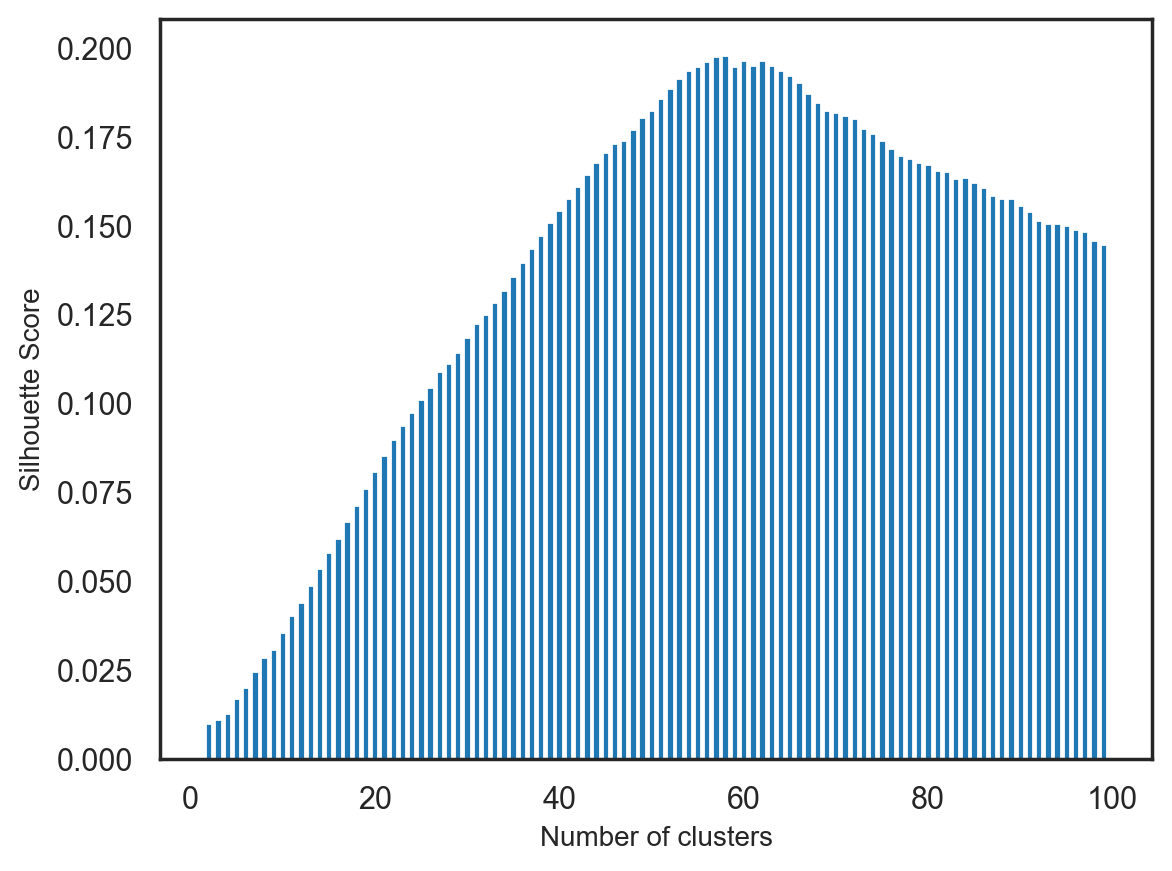

In [31]:
silhouette_scores = [] 

for n_cluster in range(2, 100):
    silhouette_scores.append( 
        silhouette_score(normalized_df, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(normalized_df))) 
    
# Plotting a bar graph to compare the results 
k = [i for i in range(2, 100)] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

In [32]:
max_silhouette_score = max(silhouette_scores)
print(max_silhouette_score)
num_clusters = silhouette_scores.index(max_silhouette_score)
print(num_clusters)

0.1981003405170722
56


After running the model on every feature and 1000 samples, we get a silhouette score of 0.198 with 56 clusters. The score does not incite much confidence in our model as the score is quite low leading us to believe that the model is closer to random than having a true ability to predict if a patient has heart disease.

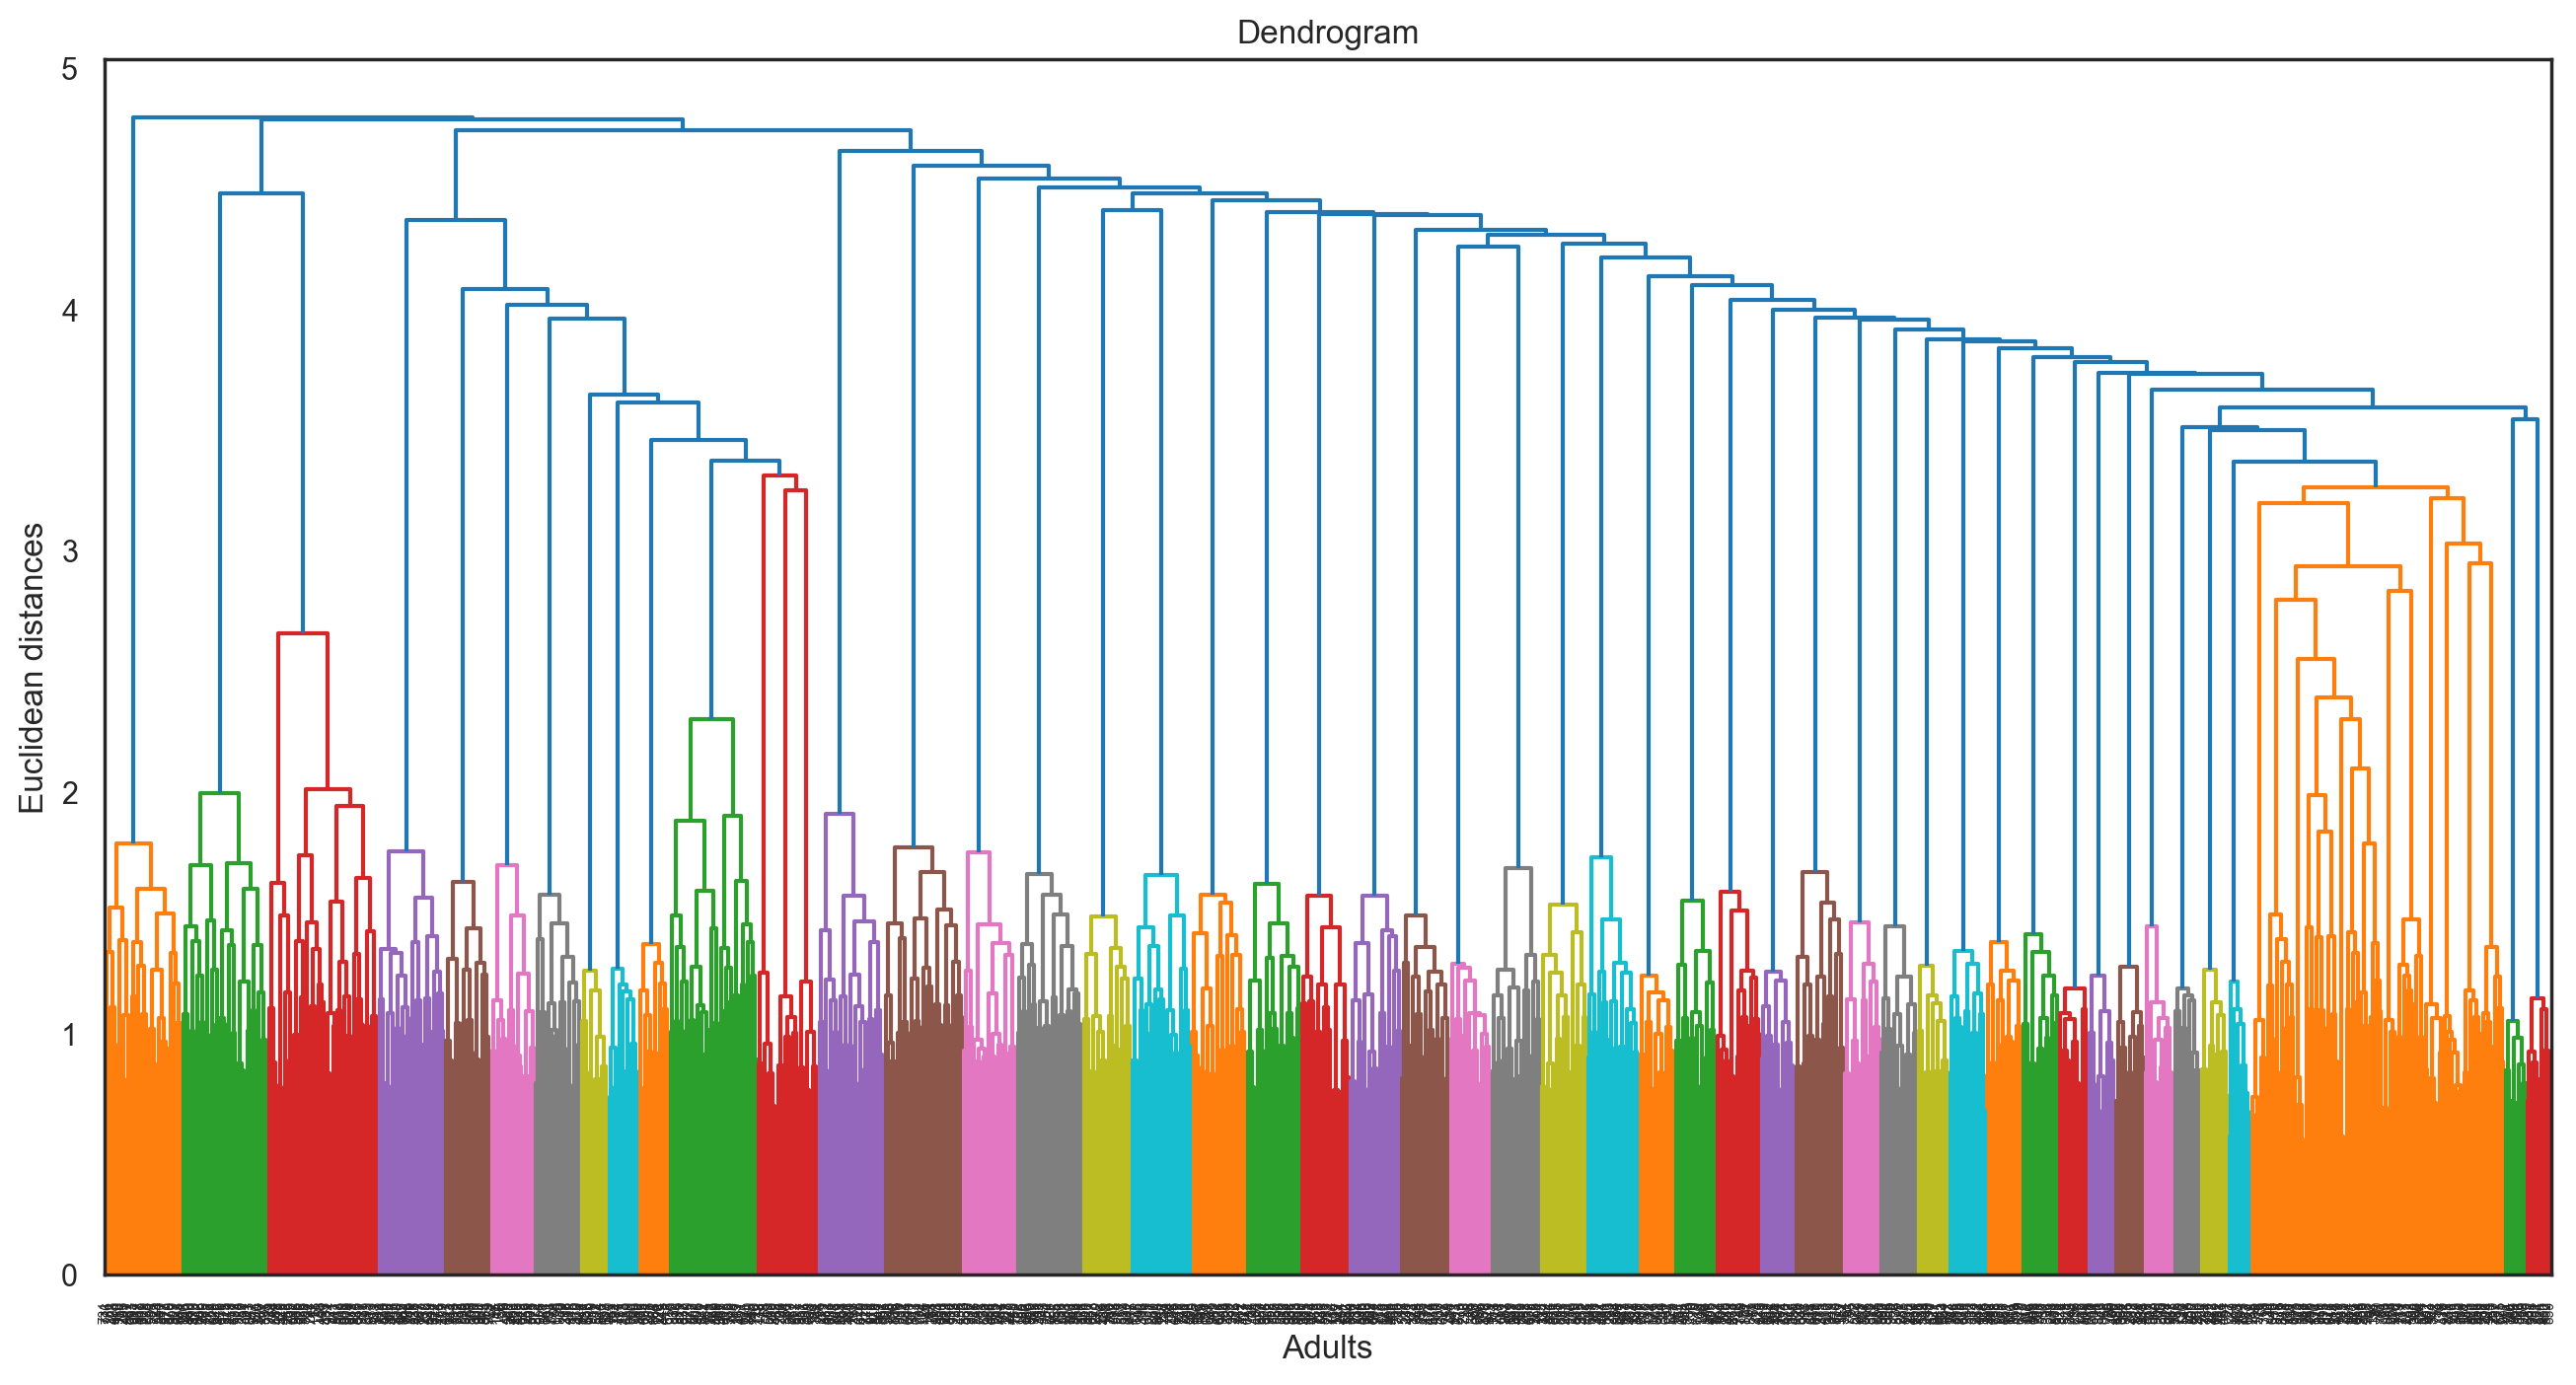

In [35]:
plt.figure(1, figsize = (16 ,8))
links = linkage(normalized_df, method = "ward")
dendrogram = dendrogram(links)

plt.title('Dendrogram')
plt.xlabel('Adults')
plt.ylabel('Euclidean distances')
plt.show()

# Gaussian Mixture Model

We begin by running a gaussian mixture model on the cleaned data for a variety of n_component values between 2 and 10 while calculating the silhouette score for each iteration:

In [14]:
from sklearn.mixture import GaussianMixture

gmm_scores = []

for k in range(2, 10):
    gmm = GaussianMixture(n_components = k, covariance_type = 'full', random_state = 42)
    gmm.fit(sampled_heart_2022)
    labels = gmm.predict(sampled_heart_2022)
    score = silhouette_score(sampled_heart_2022, labels)
    #print(f'Silhouette score for {k} clusters: {score}')
    gmm_scores.append(score)

To visualize our model performance, we plot the silhouette scores.

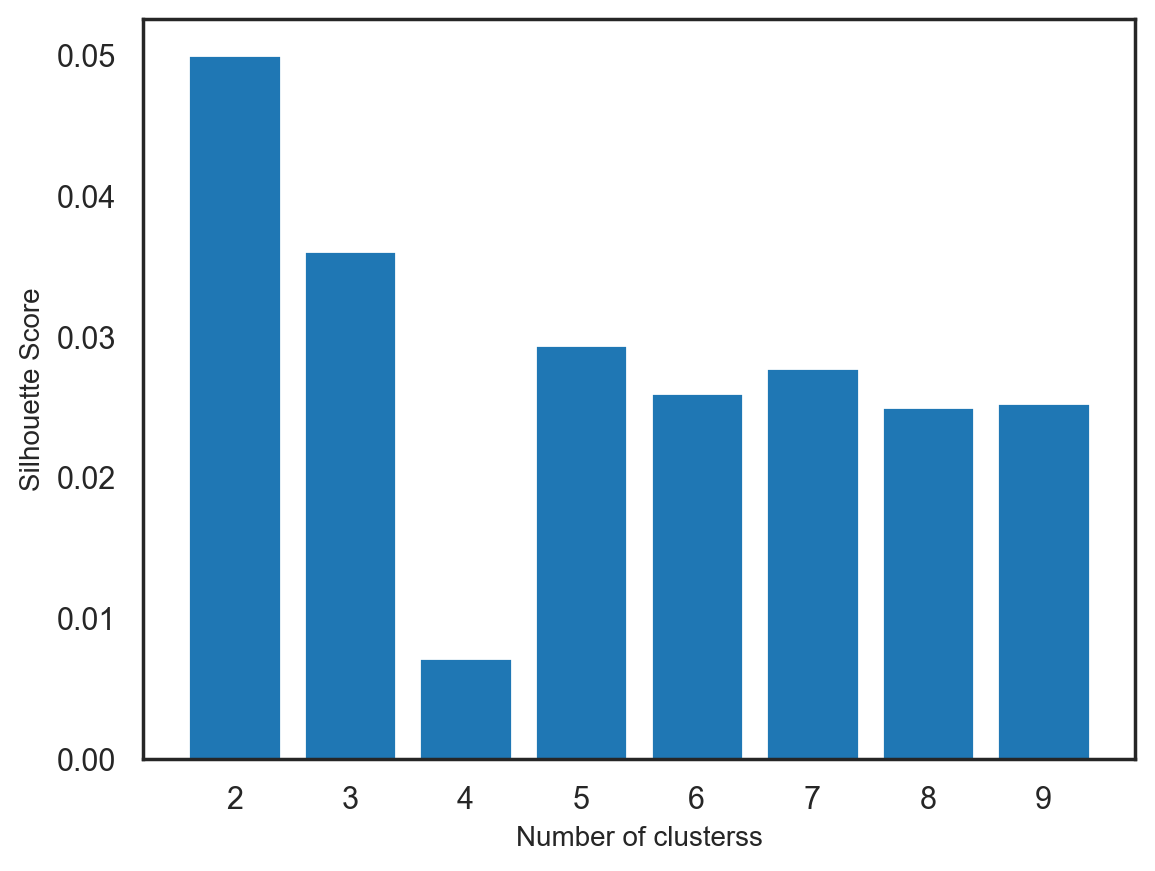

In [15]:
plt.bar(range(2, 10), gmm_scores) 
plt.xlabel('Number of clusterss', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

The score for two clusters is greatest, suggesting that this number of clusters may be the most optimal for our data. However, all the scores are extremely low, suggesting that the clustering produced by GMM's is quite poor. This may be due to the overwhelming amount of binary columns in the data set. To address this, we repeat the process on only the numerical values of the data:

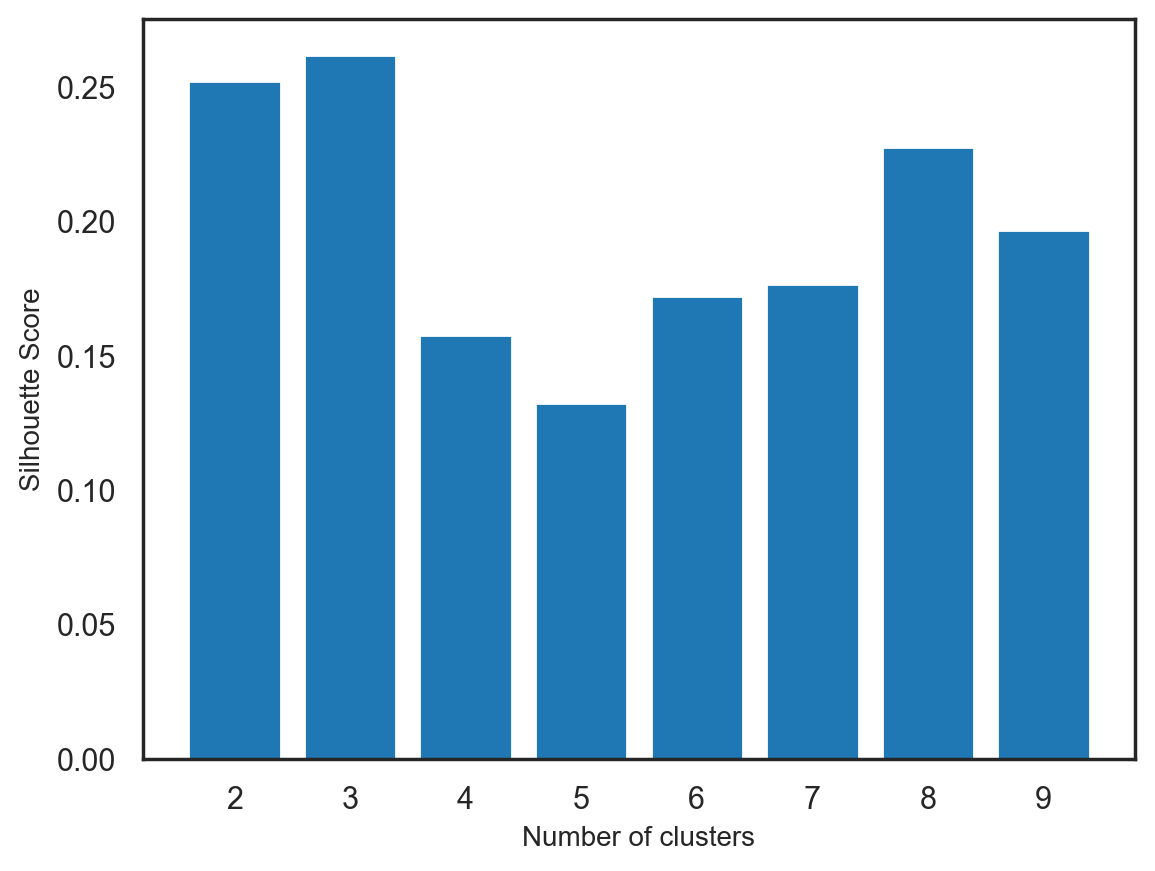

0.25207779671164426


In [16]:
sampled_heart_2022_nobin = sampled_heart_2022.select_dtypes(include=[np.float64])
gmm_scores = []

for k in range(2, 10):
    gmm = GaussianMixture(n_components = k, covariance_type = 'full', random_state = 42)
    gmm.fit(sampled_heart_2022_nobin)
    labels = gmm.predict(sampled_heart_2022_nobin)
    score = silhouette_score(sampled_heart_2022_nobin, labels)
    #print(f'Silhouette score for {k} clusters: {score}')
    gmm_scores.append(score)
    
plt.bar(range(2, 10), gmm_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

print(gmm_scores[0])

2 components continues to have the highest silhouette score. Addtionally, scores across the board have increased significantly. Despite this, with a max score of 0.25207779671164426, a Gaussian Mixture Model doesn't seem to be producing the best clustering for our data set.

# KMeans

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from kneed import KneeLocator
from mpl_toolkits.mplot3d import Axes3D

# KMeans clustering
kmeans_scores = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(sampled_heart_2022)
    labels = kmeans.predict(sampled_heart_2022)
    score = silhouette_score(sampled_heart_2022, labels)
    kmeans_scores.append(score)

ModuleNotFoundError: No module named 'kneed'

Let's visualize the silhouette scores for K-means.

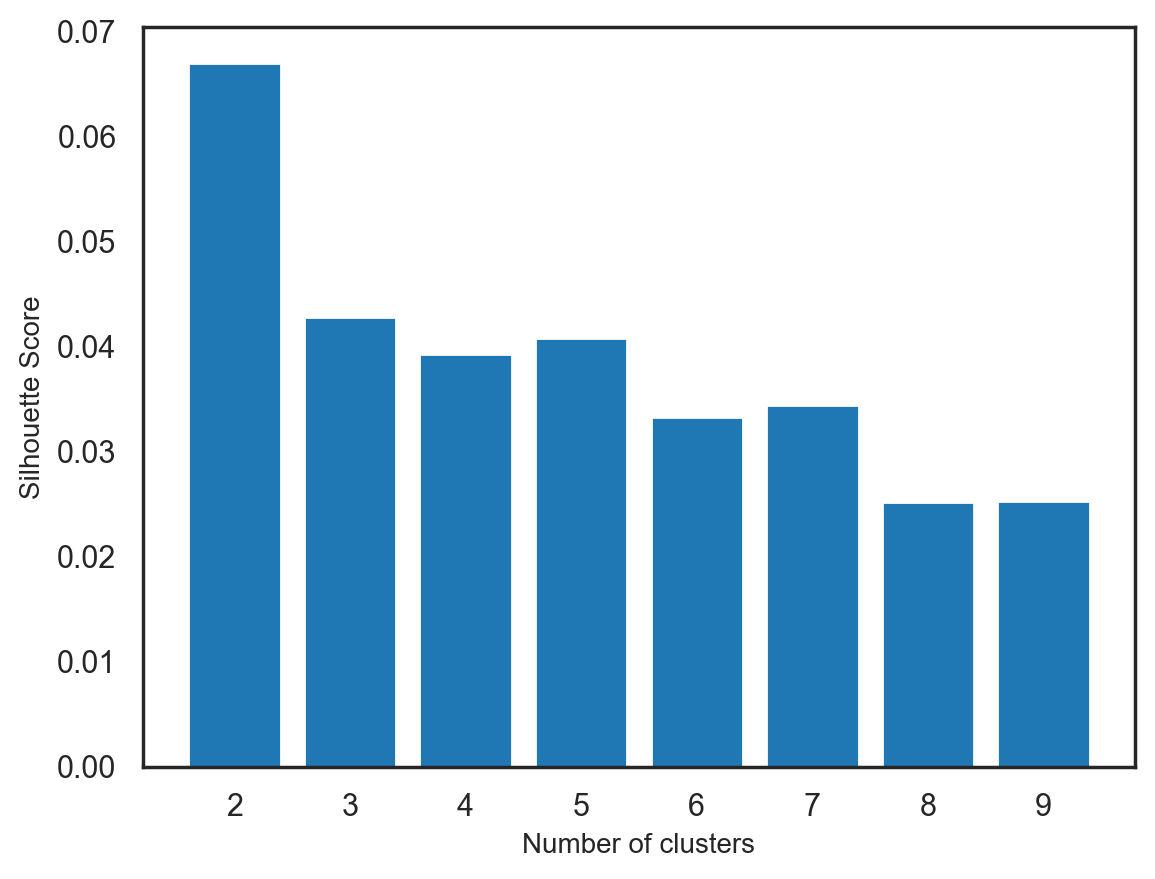

In [18]:
plt.bar(range(2, 10), kmeans_scores)
plt.xlabel('Number of clusters', fontsize=10)
plt.ylabel('Silhouette Score', fontsize=10)
plt.show()

Similar to Guassian Mixture Model, the Silhouette scores for K-means is very low for all clusters, with the score for 2 clusters being the highest. Therefore, let's repeat the process while using OneHot Encoding for categorical data and Scaler for the numerical data.

In [19]:
numerical_df = sampled_heart_2022.select_dtypes(include=[np.float64])
categorical_df = sampled_heart_2022.select_dtypes(include=[object])

# Handle categorical variables (one-hot encoding)
encoder = OneHotEncoder()
encoded_categorical = pd.DataFrame(encoder.fit_transform(categorical_df).toarray())

# Standardize numerical features
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(numerical_df)

# Combine numerical and encoded categorical features
processed_df = pd.concat([pd.DataFrame(scaled_numerical), encoded_categorical], axis=1)

Let's PCA this data to reduce the number of features and find how much each PC affects the total variance of the data. 

Variance explained by Principal Component 1: 0.34
Variance explained by Principal Component 2: 0.22
Variance explained by Principal Component 3: 0.16
Total variance explained by Principal Component: 0.72


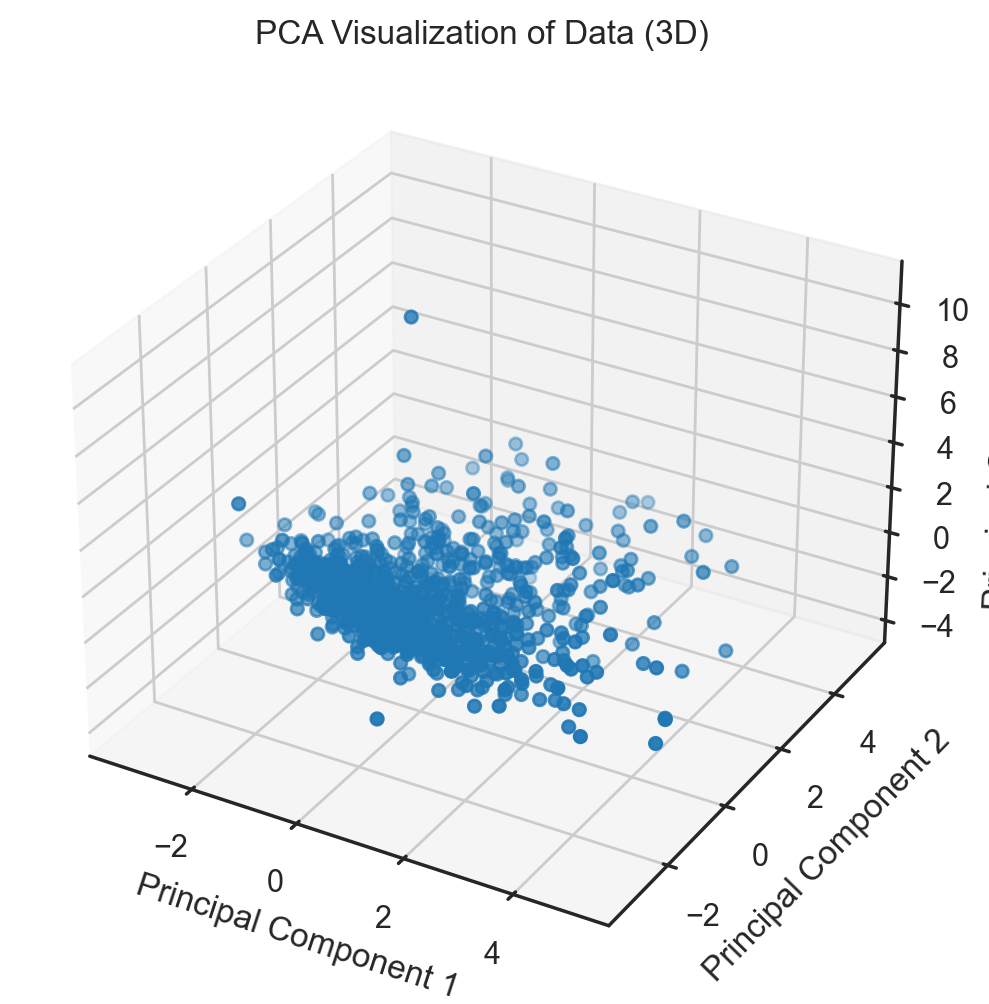

In [20]:
# Apply dimensionality reduction (PCA) with 3 components
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(processed_df)

variance_explained = pca.explained_variance_ratio_
total_variance_explained = 0

for i, var in enumerate(variance_explained):
    print(f"Variance explained by Principal Component {i+1}: {var:.2f}")
    total_variance_explained += var
print(f"Total variance explained by Principal Component: {total_variance_explained:.2f}")

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reduced_features[:, 0], reduced_features[:, 1], reduced_features[:, 2])
ax.set_title('PCA Visualization of Data (3D)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

Now, let's try K-means to cluster the data once again and see if there are any differences in the Silhouette scores. 

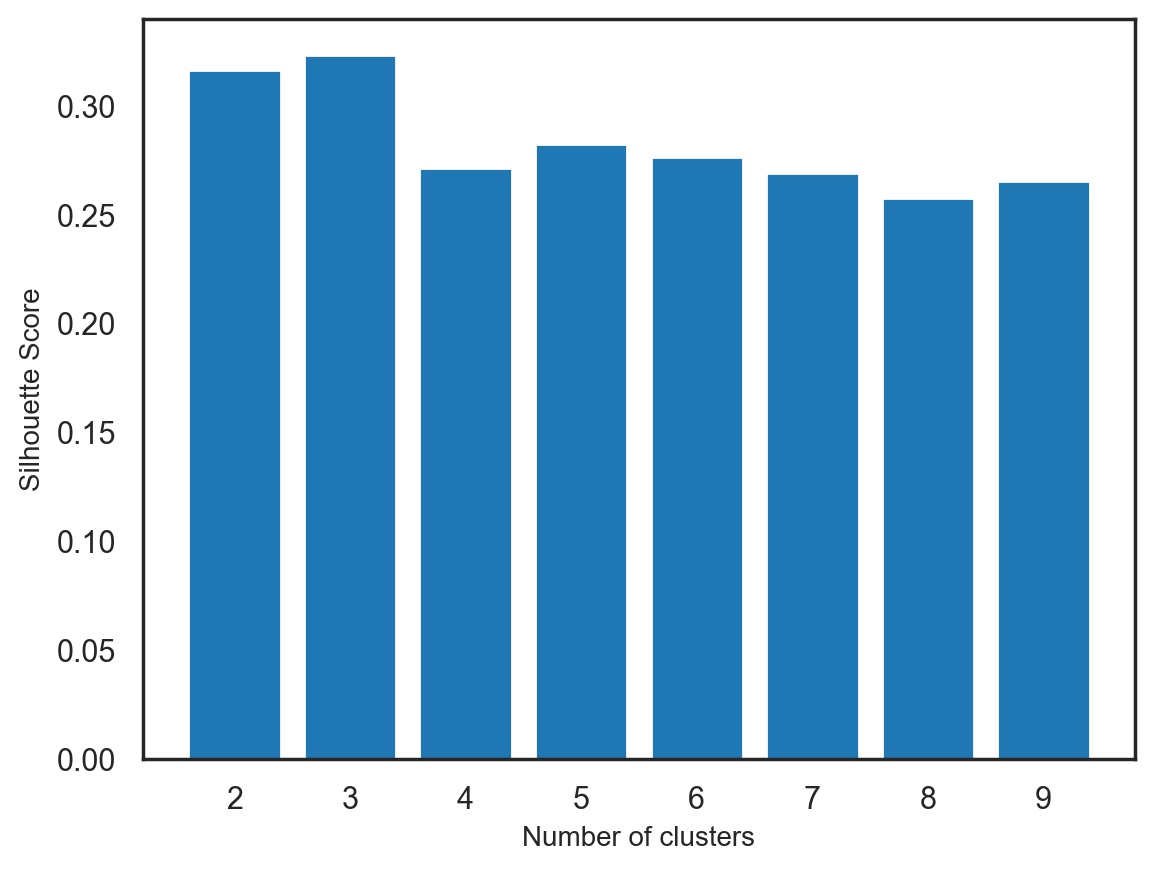

In [21]:
kmeans_scores = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(reduced_features)

    score = silhouette_score(reduced_features, labels)
    kmeans_scores.append(score)
    
plt.bar(range(2, 10), kmeans_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

We can see that the Silhouette scores are significantly higher, with the highest scores being for 2 and 4 clusters. 

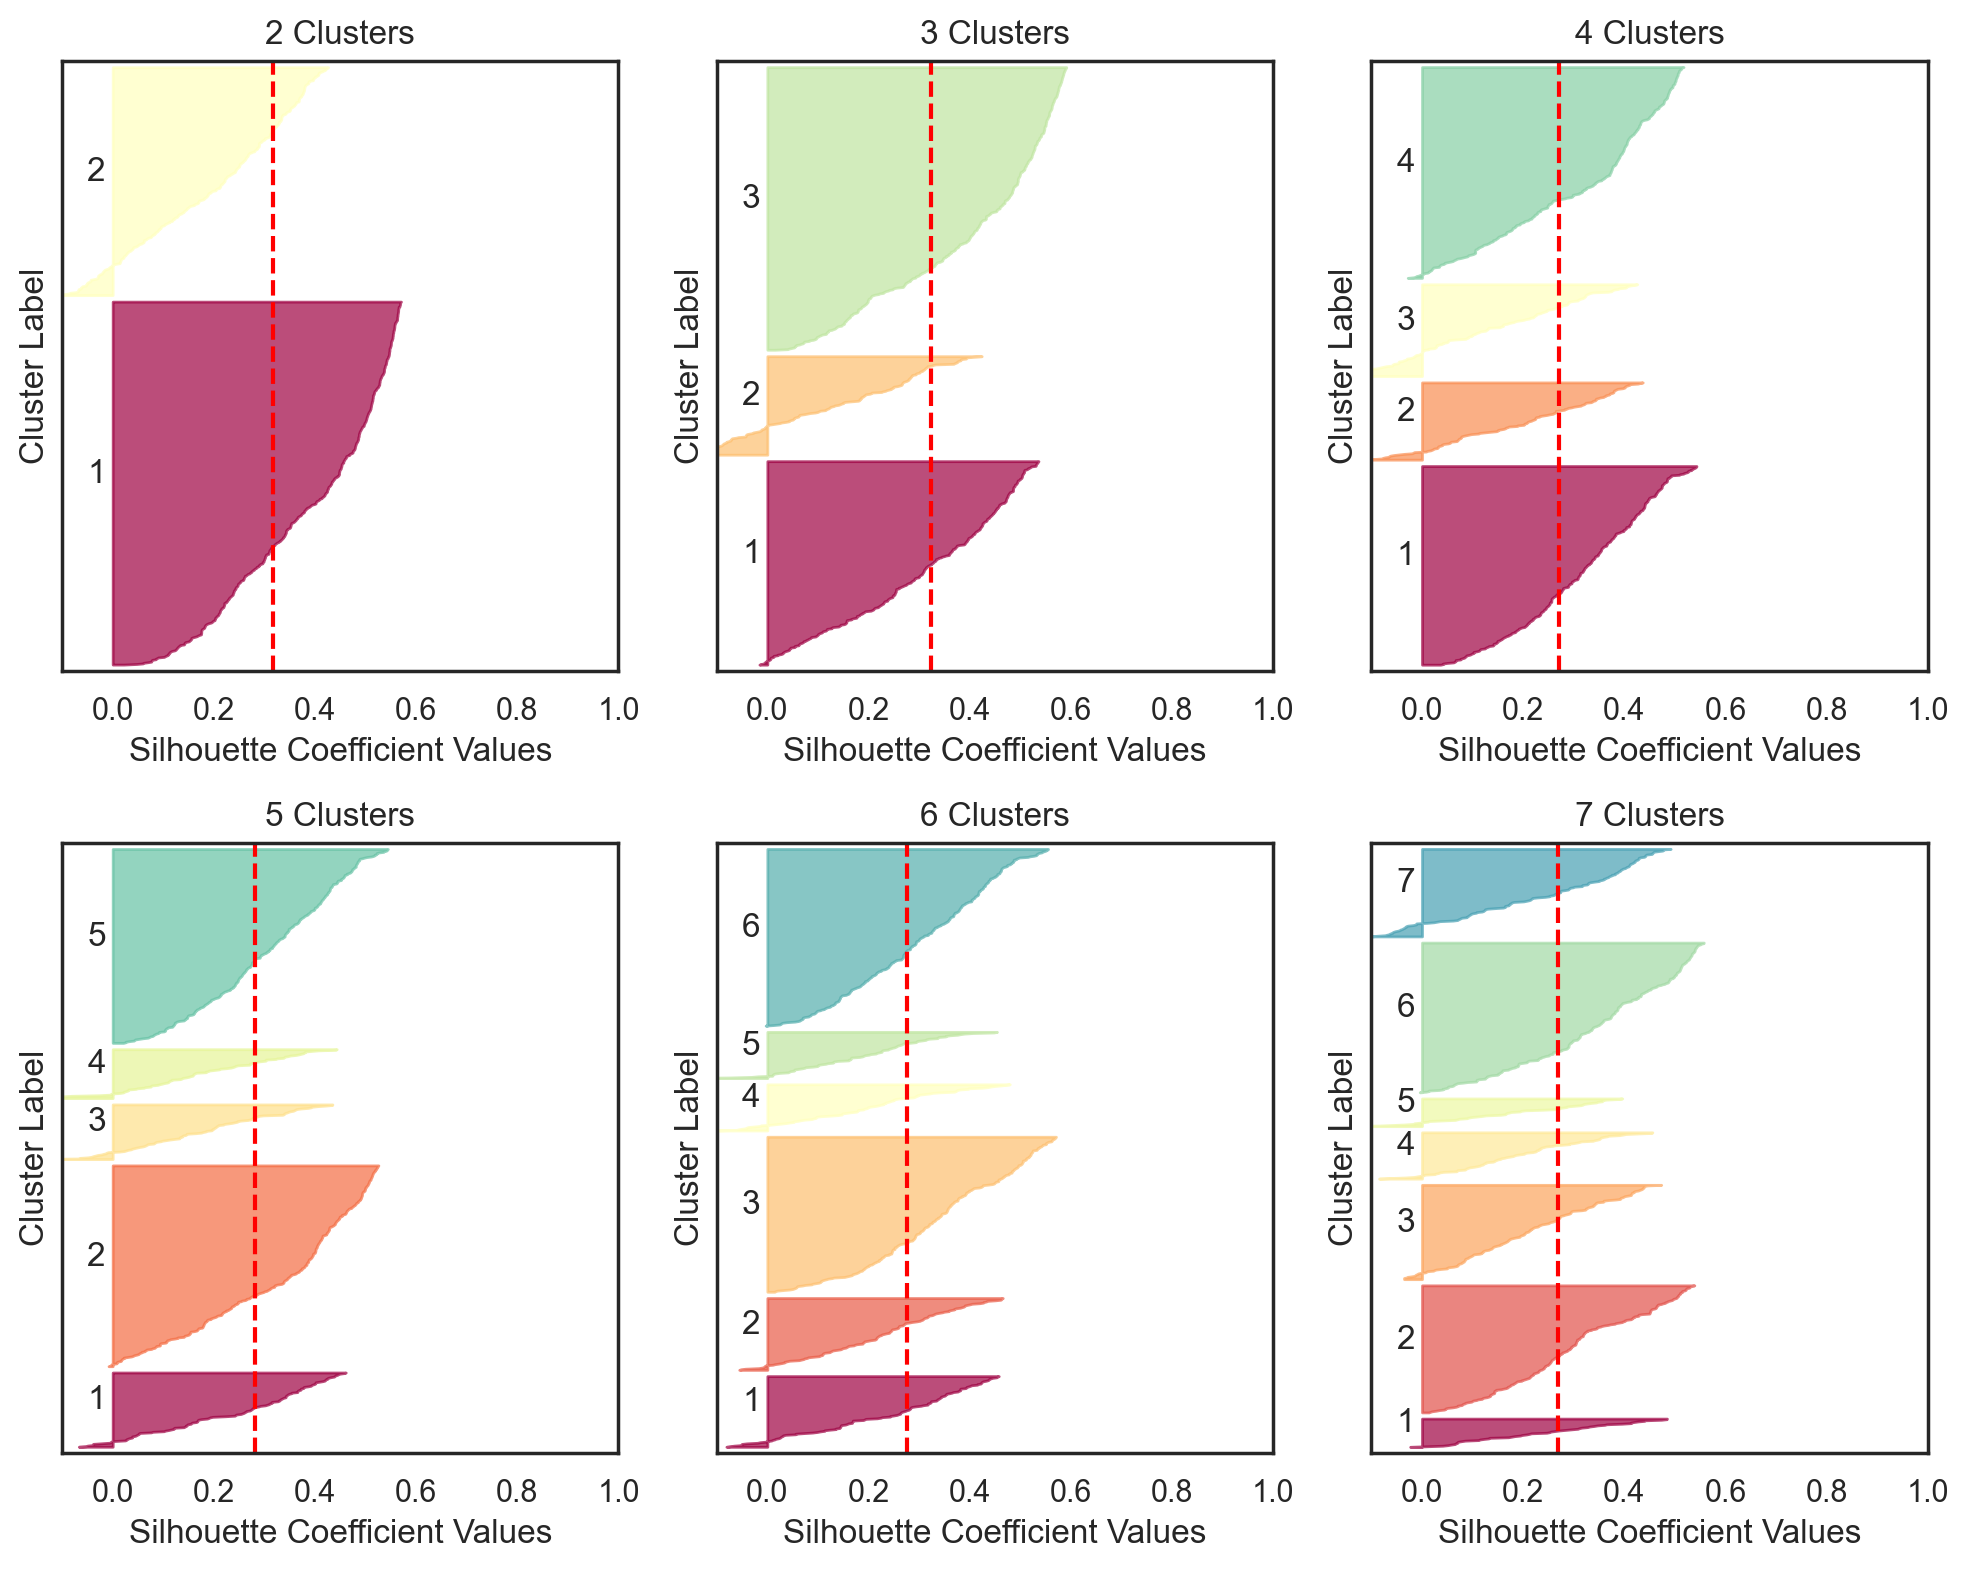

In [22]:
# Analyze silhouette scores for different number of clusters
cluster_configs = [2, 3, 4, 5, 6, 7]
silhouette_scores = []

plt.figure(figsize=(10, 8))

for idx, k in enumerate(cluster_configs, 1):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(reduced_features)
    
    silhouette_scores.append(silhouette_score(reduced_features, labels))
    silhouette_vals = silhouette_samples(reduced_features, labels)

    ax = plt.subplot(2, 3, idx)
    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(reduced_features) + (k + 1) * 10])
    
    y_lower = 10

    for i in range(k):
        ith_cluster_silhouette_vals = silhouette_vals[labels == i]
        ith_cluster_silhouette_vals.sort()

        size_cluster_i = ith_cluster_silhouette_vals.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.colormaps.get_cmap("Spectral")(float(i) / k)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_vals, facecolor=color, edgecolor=color, alpha=0.7)

        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i+1))
        y_lower = y_upper + 10
    
    ax.set_title(f'{k} Clusters')
    ax.set_xlabel('Silhouette Coefficient Values')
    ax.set_ylabel('Cluster Label')

    ax.axvline(x=silhouette_scores[idx-1], color="red", linestyle="--")
    ax.set_yticks([])

plt.tight_layout()
plt.show()

As you can see, the different Silhouette Samples above display clusters with differing densities, sizes, and generally a good amount of negative values, indicating objects that are poorly matched to their own clusters in comparison with neighboring clusters. The plot with 3 clusters had the highest Silhouette Coefficient, so let's use the Elbow Method to check whether this is the optimal number of clusters to use. 

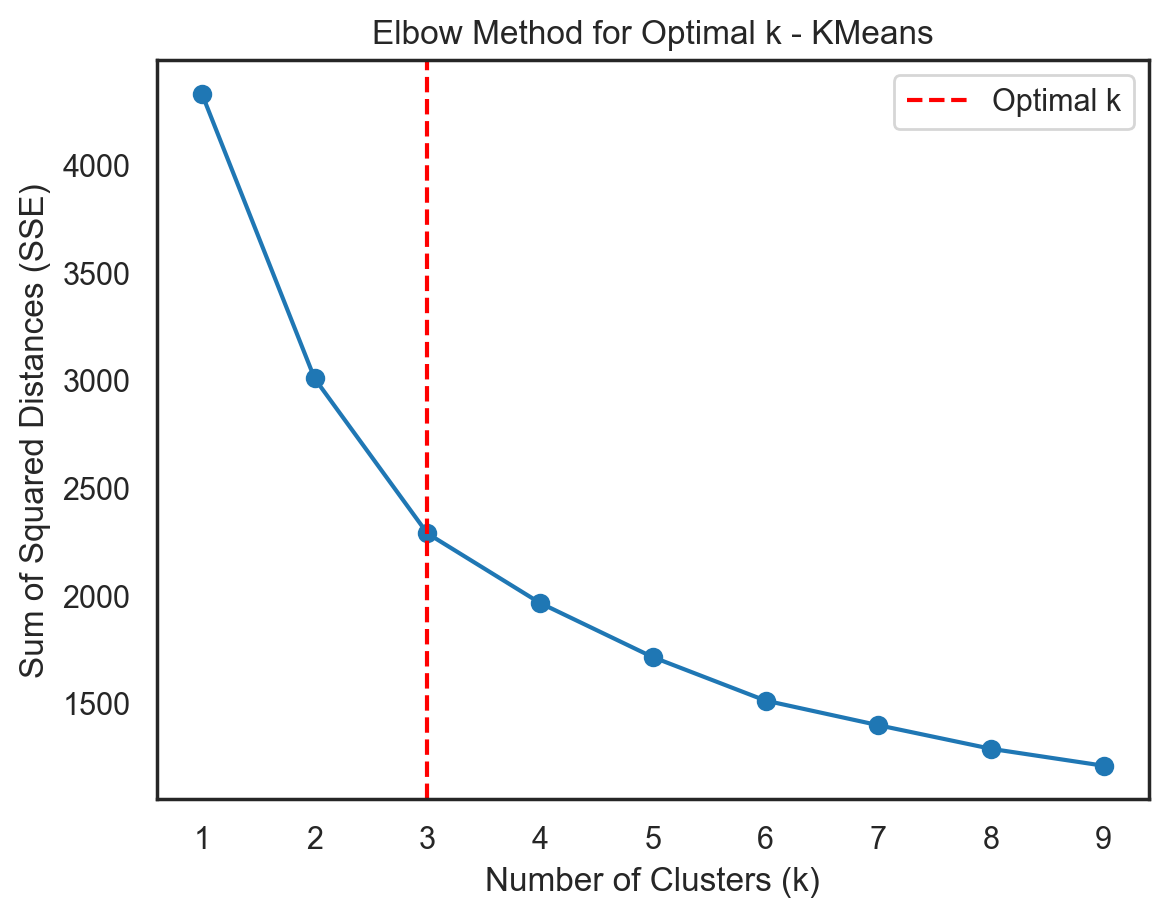

In [23]:
sse = []
max_k = 10

# Calculate SSE for different values of k
for k in range(1, max_k):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init = 10)
    kmeans.fit(reduced_features)
    sse.append(kmeans.inertia_)

# Find the elbow point
knee = KneeLocator(range(1, max_k), sse, curve='convex', direction='decreasing')

# Plot SSE curve
plt.plot(range(1, max_k), sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.title('Elbow Method for Optimal k - KMeans')
plt.xticks(range(1, max_k))
plt.axvline(knee.elbow, color='red', linestyle='--', label='Optimal k')
plt.legend()
plt.show()

K-Means Clustering Visualization 

/Users/jeffreyyang/anaconda3/envs/COGS118B_WI24/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


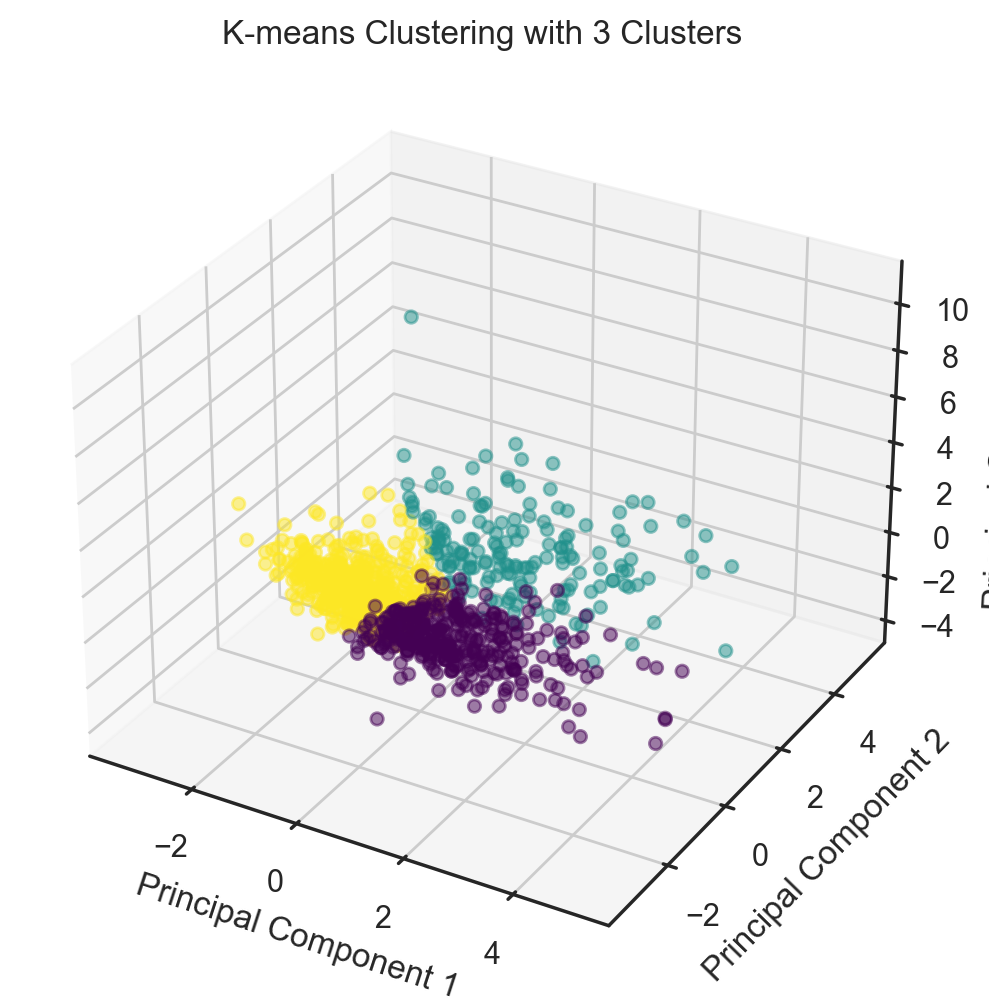

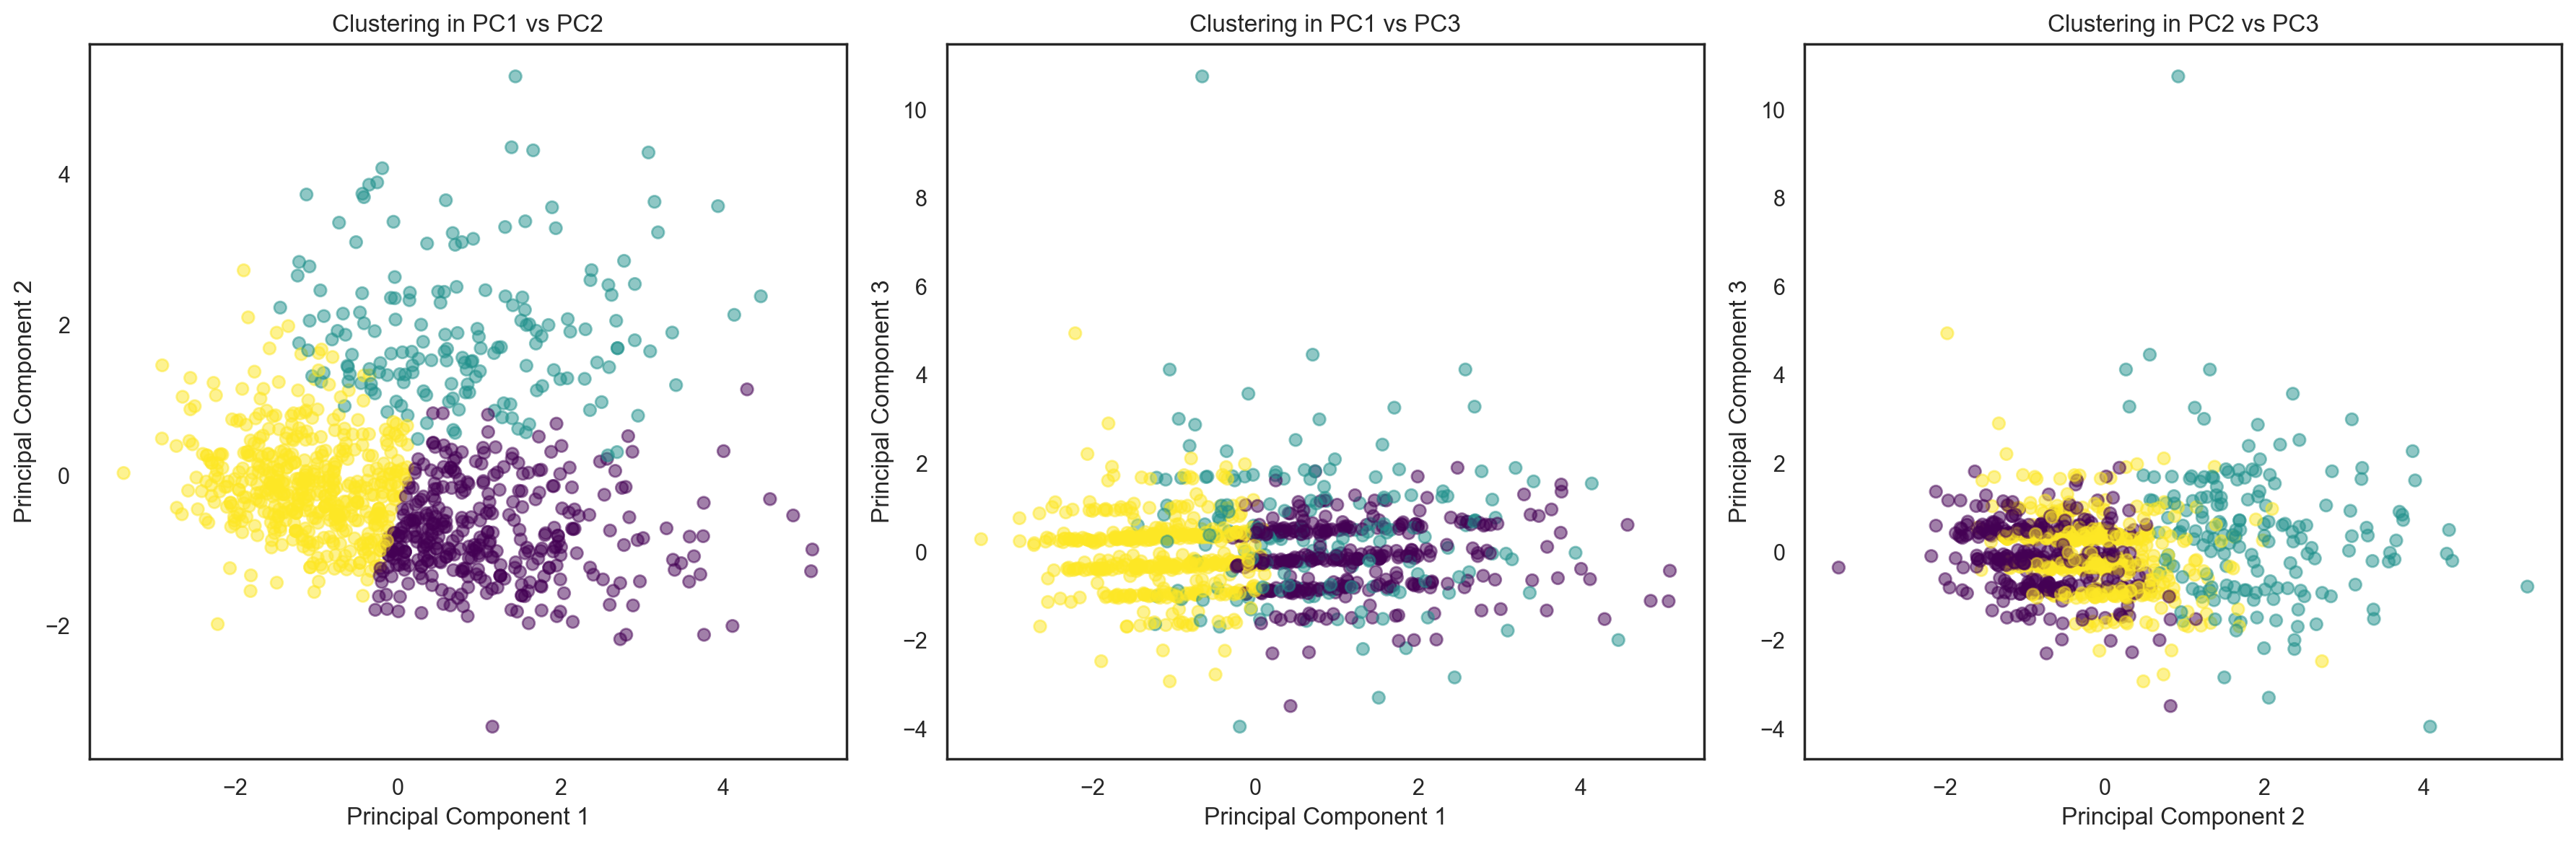

In [24]:
# Fit K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(reduced_features)

# Get cluster labels
cluster_labels = kmeans.labels_

# Plot the clustering results in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reduced_features[:, 0], reduced_features[:, 1], reduced_features[:, 2], c=cluster_labels, cmap='viridis', alpha=0.5)
ax.set_title('K-means Clustering with 3 Clusters')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

# Create subplots for each pair of dimensions
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot clustering results in each pair of dimensions
for i, ax in enumerate(axes):
    if i == 0:
        ax.scatter(reduced_features[:, 0], reduced_features[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
        ax.set_title('Clustering in PC1 vs PC2')
        ax.set_xlabel('Principal Component 1')
        ax.set_ylabel('Principal Component 2')
    elif i == 1:
        ax.scatter(reduced_features[:, 0], reduced_features[:, 2], c=cluster_labels, cmap='viridis', alpha=0.5)
        ax.set_title('Clustering in PC1 vs PC3')
        ax.set_xlabel('Principal Component 1')
        ax.set_ylabel('Principal Component 3')
    else:
        ax.scatter(reduced_features[:, 1], reduced_features[:, 2], c=cluster_labels, cmap='viridis', alpha=0.5)
        ax.set_title('Clustering in PC2 vs PC3')
        ax.set_xlabel('Principal Component 2')
        ax.set_ylabel('Principal Component 3')

plt.tight_layout()
plt.show()


# PCA the dataset

Variance Explained by each Principal Component:
Principal Component 1: 1.00
Principal Component 2: 0.00

Cumulative Variance Explained:
Principal Components 1-1: 1.00
Principal Components 1-2: 1.00

Principal Components:
        Sex  PhysicalHealthDays  MentalHealthDays  PhysicalActivities  \
0  0.000012           -0.000287         -0.000127            0.000129   
1  0.002770            0.219103          0.113308           -0.201382   

   SleepHours  HadAsthma  HadSkinCancer   HadCOPD  HadDepressiveDisorder  \
0    0.000037   0.000166       0.000063 -0.000060              -0.000145   
1   -0.022779   0.070556       0.054199  0.176289               0.133594   

   HadKidneyDisease  ...  AgeCategory_Age 75 to 79  \
0          0.000081  ...                  0.000152   
1          0.124450  ...                  0.077140   

   AgeCategory_Age 80 or older  \
0                     0.000024   
1                     0.092962   

   TetanusLast10Tdap_No, did not receive any tetanus shot in the

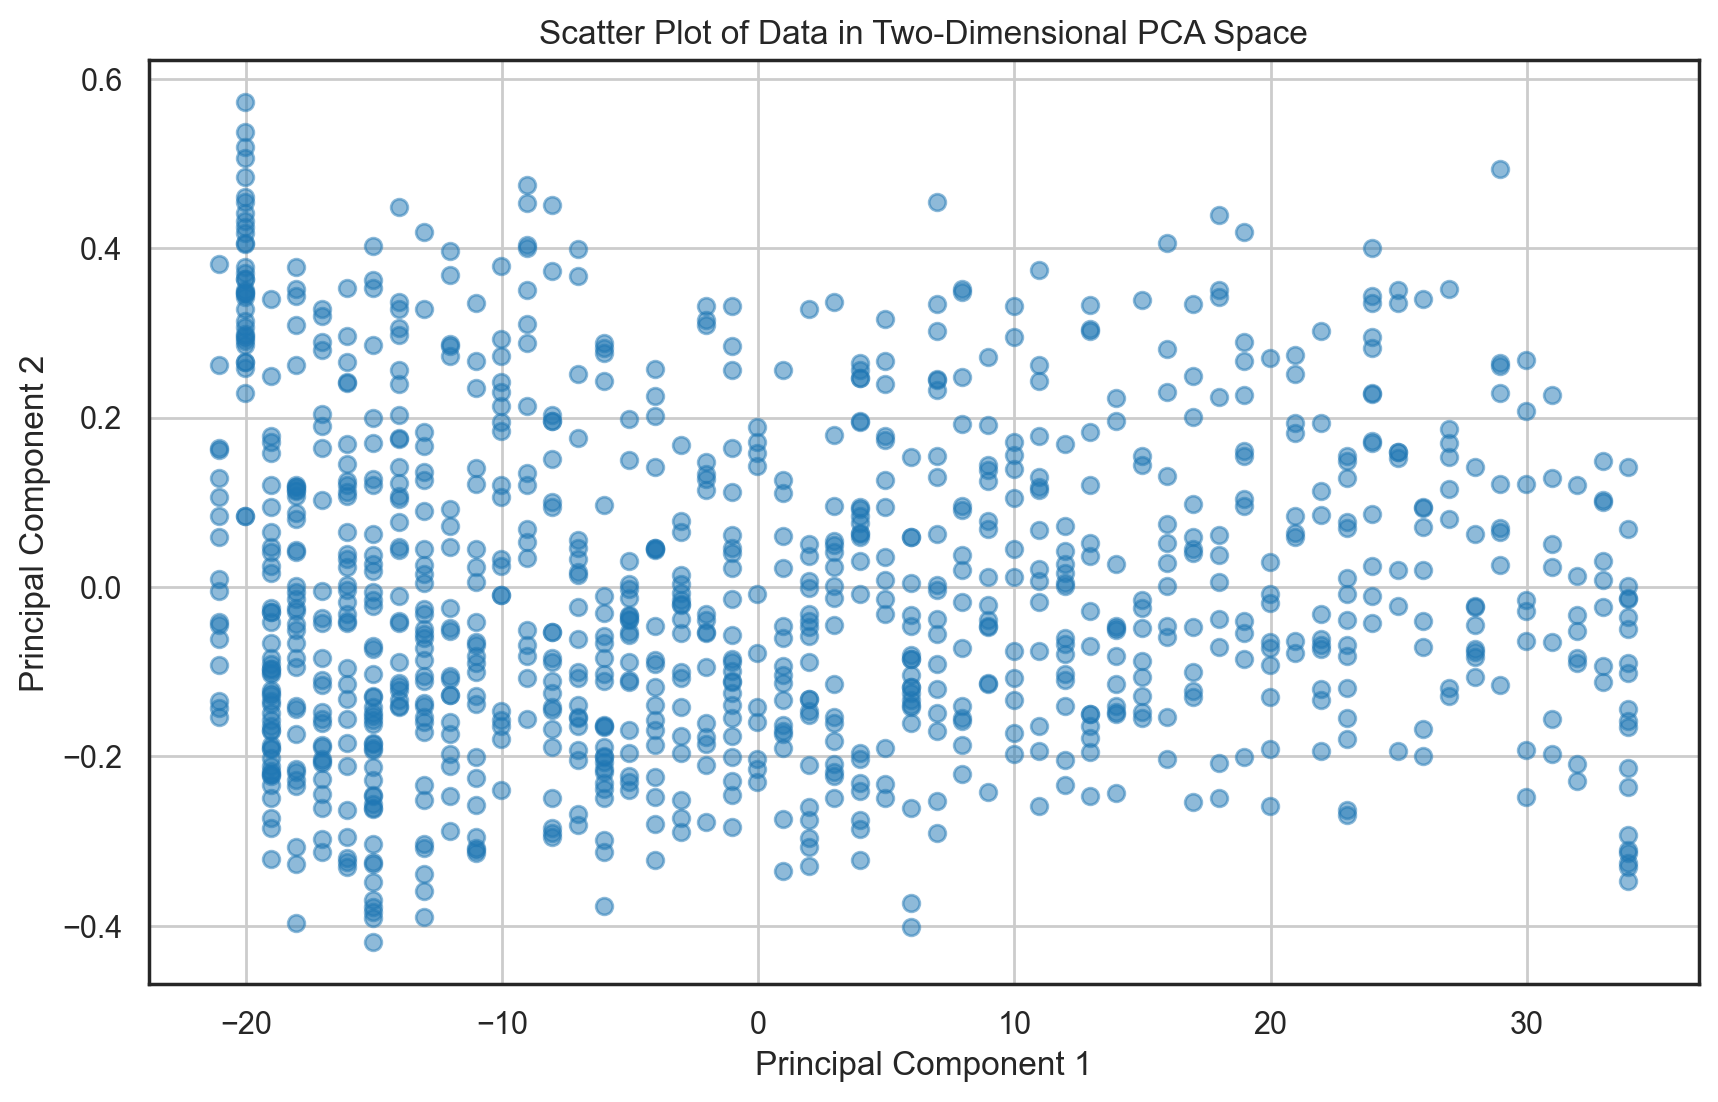

In [41]:
from sklearn.decomposition import PCA

# Perform PCA with 2 components
pca = PCA(n_components=2)
pca.fit(normalized_df)
projected_data = pca.transform(normalized_df)
projected_df = pd.DataFrame(data=projected_data, columns=['PC1', 'PC2'])

# Variance by each Principal Component (first two components)
variance_explained = pca.explained_variance_ratio_
print("Variance Explained by each Principal Component:")
for i, var in enumerate(variance_explained):
    print(f"Principal Component {i+1}: {var:.2f}")

# Cumulative variance 
cumulative_variance_explained = variance_explained.cumsum()
print("\nCumulative Variance Explained:")
for i, cum_var in enumerate(cumulative_variance_explained):
    print(f"Principal Components 1-{i+1}: {cum_var:.2f}")

# All Principal Components and Loadings
components_df = pd.DataFrame(pca.components_, columns=normalized_df.columns)
print("\nPrincipal Components:")
print(components_df)

# Plot the data points in the new two-dimensional space
plt.figure(figsize=(10, 6))
plt.scatter(projected_df['PC1'], projected_df['PC2'], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Data in Two-Dimensional PCA Space')
plt.grid(True)
plt.show()

# PCA with Three Components

Variance Explained by each Principal Component:
Principal Component 1: 1.00
Principal Component 2: 0.00
Principal Component 3: 0.00

Cumulative Variance Explained:
Principal Components 1-1: 1.00
Principal Components 1-2: 1.00
Principal Components 1-3: 1.00

Principal Components:
        Sex  PhysicalHealthDays  MentalHealthDays  PhysicalActivities  \
0  0.000012           -0.000287         -0.000127            0.000129   
1  0.002813            0.219152          0.113295           -0.201377   
2  0.112512            0.065317          0.161203           -0.048873   

   SleepHours  HadAsthma  HadSkinCancer   HadCOPD  HadDepressiveDisorder  \
0    0.000037   0.000166       0.000063 -0.000060              -0.000145   
1   -0.022769   0.070514       0.054188  0.176302               0.133555   
2   -0.140010   0.021746      -0.157617 -0.018760               0.105604   

   HadKidneyDisease  ...  AgeCategory_Age 75 to 79  \
0          0.000081  ...                  0.000152   
1          0.1

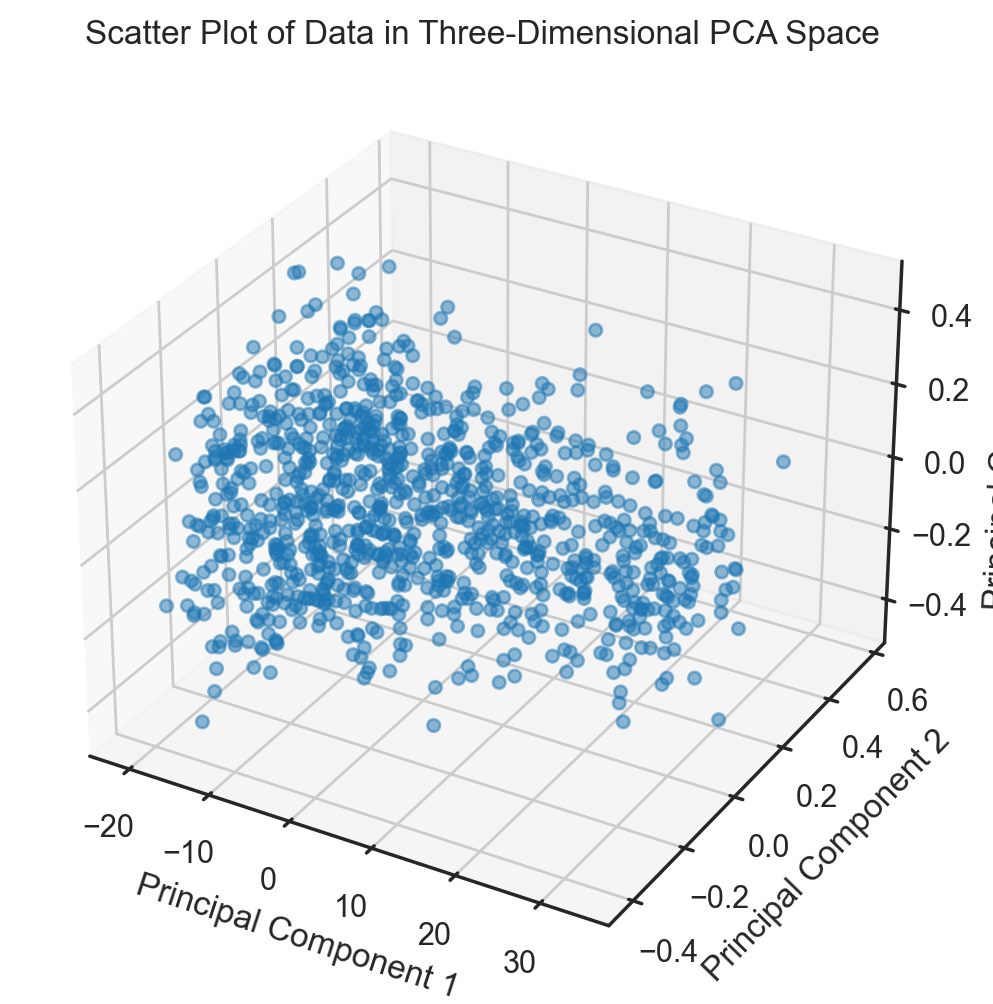

In [42]:
from sklearn.decomposition import PCA

# Perform PCA with 3 components
pca = PCA(n_components=3)  # Change the number of components to 3
pca.fit(normalized_df)
projected_data = pca.transform(normalized_df)

projected_df = pd.DataFrame(data=projected_data, columns=['PC1', 'PC2', 'PC3'])  # Update column names

# Variance by each Principal Component (first three components)
variance_explained = pca.explained_variance_ratio_
print("Variance Explained by each Principal Component:")
for i, var in enumerate(variance_explained):
    print(f"Principal Component {i+1}: {var:.2f}")

# Cumulative variance 
cumulative_variance_explained = variance_explained.cumsum()
print("\nCumulative Variance Explained:")
for i, cum_var in enumerate(cumulative_variance_explained):
    print(f"Principal Components 1-{i+1}: {cum_var:.2f}")

# All Principal Components and Loadings
components_df = pd.DataFrame(pca.components_, columns=normalized_df.columns)
print("\nPrincipal Components:")
print(components_df)

# Plot the data points in the new three-dimensional space
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(projected_df['PC1'], projected_df['PC2'], projected_df['PC3'], alpha=0.5)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('Scatter Plot of Data in Three-Dimensional PCA Space')
plt.show()


# Hierarchical Clustering on PCA Data

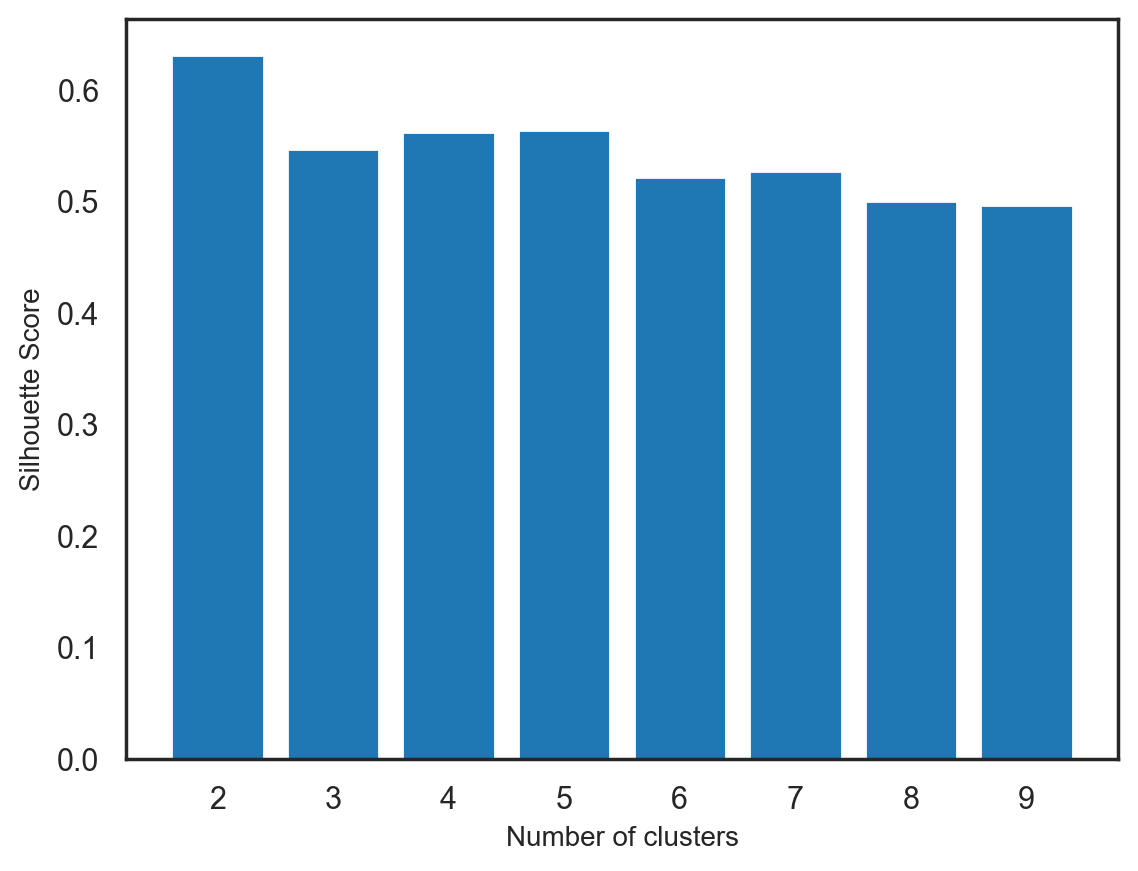

0.6312851195227986
0.5469680958911276


In [57]:
silhouette_scores = [] 

for n_cluster in range(2, 10):
    silhouette_scores.append( 
        silhouette_score(projected_df, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(projected_df))) 
    
# Plotting a bar graph to compare the results 
k = [i for i in range(2, 10)] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()
print(silhouette_scores[0])
print(silhouette_scores[1])

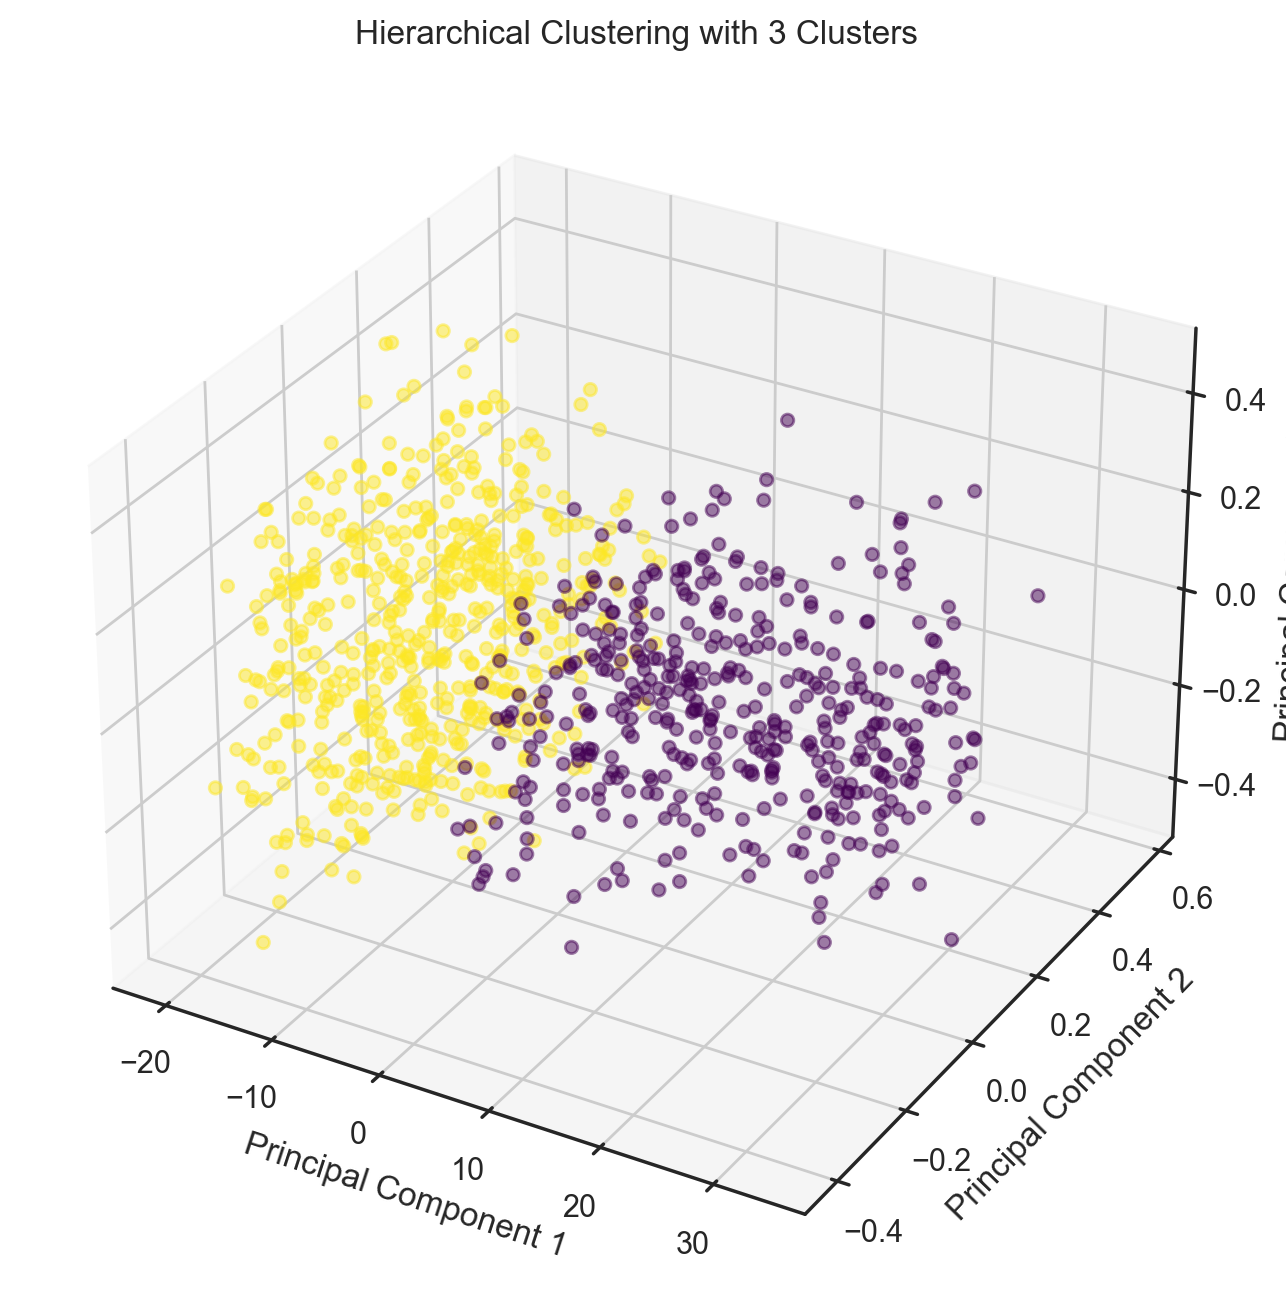

In [56]:
# Fit K-means clustering with 3 clusters
hc_cluster = AgglomerativeClustering(n_clusters=2).fit(projected_df)

# Get cluster labels
hc_cluster_labels = hc_cluster.labels_

# Plot the clustering results in 3D
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(projected_df.iloc[:, 0], projected_df.iloc[:, 1], projected_df.iloc[:, 2], c=hc_cluster_labels, cmap='viridis', alpha=0.5)
ax.set_title('Hierarchical Clustering with 3 Clusters')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

With the PCA dataset of three components we can see that it had a significant impact as we've separated the data into the features that have the greatest importance in determining whether a patient has heart disease. A score of 0.631 is much larger than our initial score of 0.198 and we can be more sure that our Hierarchical Clustering model has a much greater capability in predicting whether a patient has heart disease rather than guessing. The model did have a better score with two clusters rather than three with a difference of approximately 0.1 in silhouette score thus the use of two clusters rather than three.

# Running GMM on PCA Data

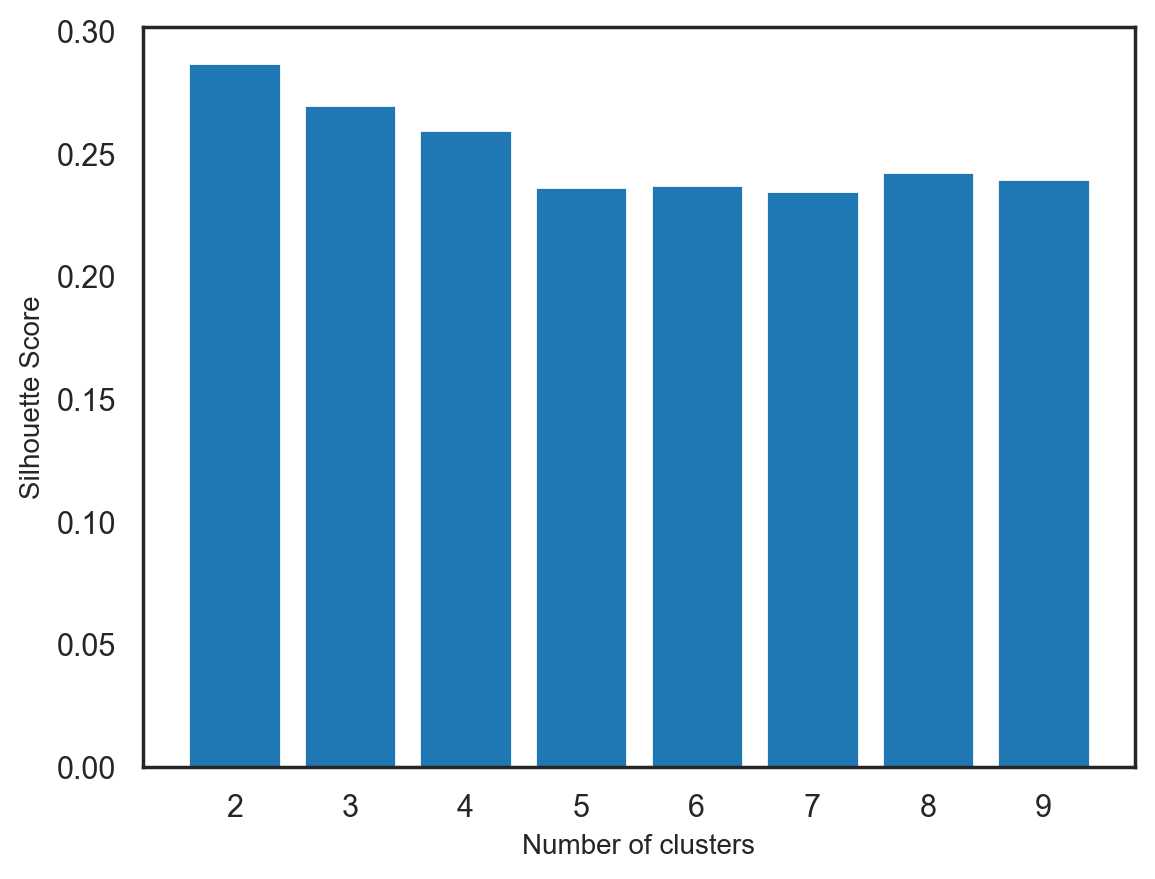

0.2870407276500639


In [47]:
# We will rerun the GMM on the new data frame after running PCA

gmm_scores = []

for k in range(2, 10):
    gmm = GaussianMixture(n_components = k, covariance_type = 'full', random_state = 42)
    gmm.fit(projected_data)
    labels = gmm.predict(projected_data)
    score = silhouette_score(projected_data, labels)
    #print(f'Silhouette score for {k} clusters: {score}')
    gmm_scores.append(score)
    
plt.bar(range(2, 10), gmm_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

print(gmm_scores[0])

We can observe that the new GMM models are now performing slightly better than on the non-PCA data, with two clusters still being most optimal. However, with a highest silhouette score of 0.2870407276500639, these models still seem to be unsatisfactory.

## Footnotes
1. <a name="cite_note-1"></a>[](#cite_ref-1) Powell-Wiley TM, Poirier P, Burke LE, Després J-P, Gordon-Larsen P, Lavie CJ, Lear SA, Ndumele CE, Neeland IJ, Sanders P, St-Onge M-P; on behalf of the American Heart Association Council on Lifestyle and Cardiometabolic Health; Council on Cardiovascular and Stroke Nursing; Council on Clinical Cardiology; Council on Epidemiology and Prevention; and Stroke Council. Obesity and cardiovascular disease: a scientific statement from the American Heart Association. Circulation. 2021;143:e984–e1010. doi: 10.1161/CIR.0000000000000973
2. <a name="cite_note-2"></a>[](#cite_ref-2) "What to Know about Your Heart as You Age." WebMD, WebMD, www.webmd.com/healthy-aging/what-happens-to-your-heart-as-you-age. Accessed 16 Feb. 2024. 
3. <a name="cite_note-3"></a>[](#cite_ref-3) Srinivasan, S., Gunasekaran, S., Mathivanan, S.K. et al. An active learning machine technique based prediction of cardiovascular heart disease from UCI-repository database. Sci Rep 13, 13588 (2023). https://doi.org/10.1038/s41598-023-40717-1
4. <a name="cite_note-4"></a>[](#cite_ref-4) "Know Your Risk for Heart Disease." Centers for Disease Control and Prevention, Centers for Disease Control and Prevention, 21 Mar. 2023, www.cdc.gov/heartdisease/risk_factors.htm. 
5. <a name="cite_note-5"></a>[](#cite_ref-5) "Heart Disease." Centers for Disease Control and Prevention, Centers for Disease Control and Prevention, 9 Jan. 2024, https://www.cdc.gov/heartdisease/index.htm